# **Loan Default Prediction**

Author: Spasen Chaykov

## **Executive Summary**



### **Project title**: Loan Default Prediction

### **Project Overview**:

The goal of the project is to develop a machine learning model that can accurately identify clients who are likely to default on their home equity loan. Such a model can help banks avoid large losses from high-risk borrowers, while also removing any human biases in the approval process. Fundamentally, what we have is a classification problem, where we have to look at the features we have available and classify the client as either likely to repay their loan or likely to default. Due to the way that loan approval is set up, the data is going to always have a big imbalance, as most clients will be ones who repaid their loans. Therefore, any machine learning model that focuses on accuracy, will tend to predict most clients as probable to repay. Therfore, we want our model to be accurate enough so that it makes mostly correct predictions, while also having a high recall value, ensuring that it captures as many of the true defaulting clients as possible. From the analysis in the notebook below, we show that the best option is a tuned Extreme Gradient Boost (XGBoost) model, which is based on a decision tree ensemble learning algorithm similar to random forest. The model is very accurate on the test data and shows a recall value of 0.83, higher than any other model.

### **Key Objectives**:

The key objectives of the project are:
* Accurately identify clients who will default on their loan
* Understand the important factors that contribute to defaults, which can help to improve lending decisions
* Minimize the banks potential losses on unrepaid loans, while not removing too many potetial clients

### **Methodology**:

To achieve the project goals, the notebook below is structured as follows:
1. We begin by restating the problem and giving additional context.
2. We then import the data set of 5960 home equity loans, which includes different information about the clients described in the table below, as well as whether they defaulted on the loan or not.
3. We look at some summary statistics of the data and perform exploratory data analysis and visualization to understand the structure of the data and the relationship between the variables.
4. We then treat any outliers by performing windsorization (cutting of the extreme values in the distributions of numerical variables) and we impute any missing values based on the median for numerical variables and on the mode for categorical varibles.
5. We then split the data set into a training set and a test set and begin building the different models, based on four main categories:
  * Logistic regression
  * Decision Tree
  * Random Forest
  * Extreme Gradient Boosting
6. Finally, we compare the metrics for all models and decide on which model is best to implement.

### **Results and Key Insights**:

From the analysis in the notebook we can draw the following conclusions:
- The most important feature that is consistently rated as important by all models is the debt-to-income ratio, which makes sense intuitively as it is already a key factor in the loan approval process. In practice, most banks have a hard cutoff for the debt-to-income ratio, though we can see that those are not guarantees and there can be other compounding factors that make a person likely to default even with a lower debt-to-income ratio.
- The best models overall are the tuned XGBoost, followed by the tuned Random Forest and the tuned Decision Tree. All three models show a good overall accuracy and good recall, with the XGBoost being clearly the best. One benefit of the tuned Decision Tree model over the others, is that it can be fully visualized and implemented as a procedure by human operators if desired.
- The tuned Decision Tree and tuned Random Forest both give the vast majority of importance on the debt-to-income ratio, while the tuned XGBoost also shows high importance to other metrics, like the number of delinquent credit lines and the number of derogatory reports. This suggests that the XGBoost might be better suited for real world applications, where the dept-to-income for most borrowers is going to be similar as banks already implement strict policy when it comes to that.
- Lastly, it is important to note that debt-to-income was the column with the most missing data and therefore it is likely that imputing those values can limit the performance of our models. In the ideal case, we would have a more complete data set where we have these values present for more clients.

### **Recommendations for implementation**:

As of May 2024, the total amount of money owed in home equity loans in the United States is approximately $256 billion (source: https://fred.stlouisfed.org/series/RHEACBW027SBOG ). Although the exact percent of loan defaults is hard to find, a quick Google search suggests anywhere between 0.5% and 1% for home equity loans that are delinquent by 90 days. We can see that even this small percentage can result in billions of dollars lost overall.

Based on the results of this notebook, I would make the follwoing recommendations:
- Integrate the tuned XGBoost model into the loan approval process. It can be used to assess the default risk of loan applicants in real-time and with a recall rate of 0.83, if implemented at scale it has the potential to save banks hundreds of millions by removing more than 80% of delinquent borrowers.
- Develop targeted intervention strategies based on the important features of the model and implement risk-based pricing and enhanced due diligence for high-risk borrowers identified by the model.
- Regularly update the model with new data and monitor its performance to ensure ongoing accuracy and relevance.

## **Problem statement**:

### **The Context:**

 A home equity loan (sometimes called a HEL) allows you to borrow money using the equity in your home as collateral. A significant portion of retail bank profits comes from interest on home loans. There is howerver, inherent risk in giving out loans and banks are particularly wary of defaulters, clients who fail to repay their depts. Therefore, it is crucial for banks to be judicious when approving loans for their customers. The loan approval process is often complicated, aiming to assess the applicant's creditworthiness through a manual review of various application aspects. This process is not only effort-intensive but also susceptible to errors and biases due to human involvement. With the rise of data science and machine learning, the focus has shifted to developing models that can make the loan approval process more efficient. It is therefore essential to ensure that these models can make clear, understandable recommendations and do not inherit the biases that previously existed in the human approval process.

### **The objective:**

 Our objective is to develop a machine learning classification model to predict which clients will default on their loans. It is thus essential that the model is accurate, unbiased and that the predictions are understandable.

### **The key questions:**

Some of the key questions of the problem are:
- What are the key variables that signal that a client is likely to default on their loan?
-What are the variables that make it less likely that a client will default on their loan?
- From a practical data point of view, what is the structure of the data set? Are there missing values, outliers, what are the different distributions of the variables?
- Which classification models should be considered to try to predict whether a client will default on their loan?
- Which metrics should be used to evaluate the different models?
- Which model best accomplishes the task?

All of these questions will be addressed in the notebook.
### **The problem formulation**:
As previously stated, our goal is to build a machine learning classification model that can predict which clients are likely to default on their loan. The problem will be approached as follows:
- First, we will import the data and perform exploratory data analysis to understand its structure, value types, distributions and correlations.
- We will then prepare the data by eliminating outliers, addressing missing values, scaling or anything else that is needed.
- Then we will build different models for classification, like logistic regression, decision trees, random forest, and extreme gradient boosing. We can perform tuning on the models to try to improve their performance.
- Finally, we will compare the different models and decide which one can be implemented as a solution.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [17]:
# Libraries for data analysis and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

# For data preparation
from sklearn.model_selection import train_test_split

# To scale the data
from sklearn.preprocessing import StandardScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree and Random Forest Classifier Models
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score, f1_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# For plotting the decision tree
from sklearn.tree import plot_tree

# Installing the xgboost library
!pip install xgboost

# Importing the XGBClassifier
from xgboost import XGBClassifier

# For better looking tables
from IPython.display import display

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)



[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: C:\Users\spase\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **Data Overview**

We start by reading in the data set and making some basic observations for the type and shape of the data, as well as checking for any missing values.

In [28]:
# Read in the data
data = pd.read_csv('Data/hmeq.csv')
df = data.copy() # defining the data frame to be used as a copy of the original data

In [29]:
# Display the first five rows of the data
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

Observations:

We can see that we have several NaN values in the data set.

In [30]:
# Print the number of rows and columns in the data
print("There are "+ str(df.shape[0]) +" rows and " + str(df.shape[1]) +" columns in the data set.")

There are 5960 rows and 13 columns in the data set.


In [31]:
# Get basic column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Observations:

We have 13 columns, 9 of which are given as a float value, 2 as an integer value, and 2 as an object value. We also have some null values in the data. The total number of customers is 5960.

In [32]:
# Count the number of null entries in each column of the data
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Observations:

All columns except BAD and LOAN have missing values. The debt to income column has the largest amount of missing values, followed by the number of derogatory reports column.

## **Summary Statistics**

In [33]:
# Print the number and percentage of clients who defaulted on loan
default_num = df.loc[df["BAD"]== 1].shape[0]
print(f'A total of {default_num} customers defaulted on their loans of {round(default_num/df.shape[0]*100,2)} percent of all customers in the data set.')

A total of 1189 customers defaulted on their loans of 19.95 percent of all customers in the data set.


In [34]:
# Display some basic statistics for the numerical columns, dropping the binary BAD column
df.drop("BAD",axis=1).describe().T.round(2)

count       mean       std      min       25%       50%        75%  \
LOAN     5960.0   18607.97  11207.48  1100.00  11100.00  16300.00   23300.00   
MORTDUE  5442.0   73760.82  44457.61  2063.00  46276.00  65019.00   91488.00   
VALUE    5848.0  101776.05  57385.78  8000.00  66075.50  89235.50  119824.25   
YOJ      5445.0       8.92      7.57     0.00      3.00      7.00      13.00   
DEROG    5252.0       0.25      0.85     0.00      0.00      0.00       0.00   
DELINQ   5380.0       0.45      1.13     0.00      0.00      0.00       0.00   
CLAGE    5652.0     179.77     85.81     0.00    115.12    173.47     231.56   
NINQ     5450.0       1.19      1.73     0.00      0.00      1.00       2.00   
CLNO     5738.0      21.30     10.14     0.00     15.00     20.00      26.00   
DEBTINC  4693.0      33.78      8.60     0.52     29.14     34.82      39.00   

               max  
LOAN      89900.00  
MORTDUE  399550.00  
VALUE    855909.00  
YOJ          41.00  
DEROG        10.00  
DELINQ       15.00  
CLAGE      1168.23  
NINQ         17.00  
CLNO         71.00  
DEBTINC     203.31

In [35]:
# Display some basic statistics for the categorical columns
df.describe(include=["object"]).T

count unique      top  freq
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

Observations:

As expected, we can see that about 20% of customers defauted on their loan. We can also see the various statistics for the numerical columns and the counts of the categorical columns. Some of the columns stand out as having outliers, in particular the maximum value of the credit line age (CLAGE) of 1168.23 months which is over 97 years. We can inspect in more detail by visualizing the data and decide if we need to do some corrections for the outliers.  

## **Exploratory Data Analysis (EDA) and Visualization**

As with any data set, we start by performing some exploratory data analysis and visualization. We can begin by looking at the individual columns and then analyze any important interactions between variables. The goal is to gain insight into the different relationships between variables before we build the models.

### **Univariate Analysis**


Starting with univariate analysis, we can define some functions that will help us visualize the variables. For the numerical columns, we can use a histogram and box plot to visualize their distributions, while for the categorical variables we can use bar graphs.

In [36]:
# Defines a function that plots a histogram and box plot for the numerical variables and the mean value of the data on the histogram
def histogram_and_boxplot(df, column): # takes in a data frame and column name as inputs
    """
    Plots a histogram and box plot on the same plot for a numerical column of a dataframe

    Parameters:
    - df: The dataframe.
    - column: The column we wish to plot.
    """

    plt.figure(figsize=(14, 6)) # defines the size of the plot

    mean_value = df[column].mean() # defines the mean value so that it can be shown on the plot

    # Plot histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, palette="tab10")
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2,label=f"Mean = {round(mean_value,2)}") # adds a vertical line at the mean value
    plt.title(f'Histogram of {column}')
    plt.legend()

    # Plot box plot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], palette="tab10")
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()


In [37]:
# Defines a function that plots a bar graph of the categorical columns
def bar_graph(df, column):
    """
    Plots a bar graph for a categorical column of a dataframe

    Parameters:
    - df: The dataframe.
    - column: The column we wish to plot.
    """

    plt.figure(figsize=(6, 6)) # defines the size of the plot

    # Plot bar graph
    ax = sns.countplot(x=column, data=df, palette="tab10")
    plt.title(f'Bar Graph of {column}')

    # Calculate percentages to display on plot
    total = len(df)
    for p in ax.patches:
      count = p.get_height()
      if count > 0:  # Only annotate bars with count greater than 0
        percentage = f'{round(count / total * 100,1)}%' # calculates the percentage
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0.5, 3),
                    textcoords='offset points') # makes a percentage annotation on the plot

    plt.show()

1. Amount of loan approved (LOAN)

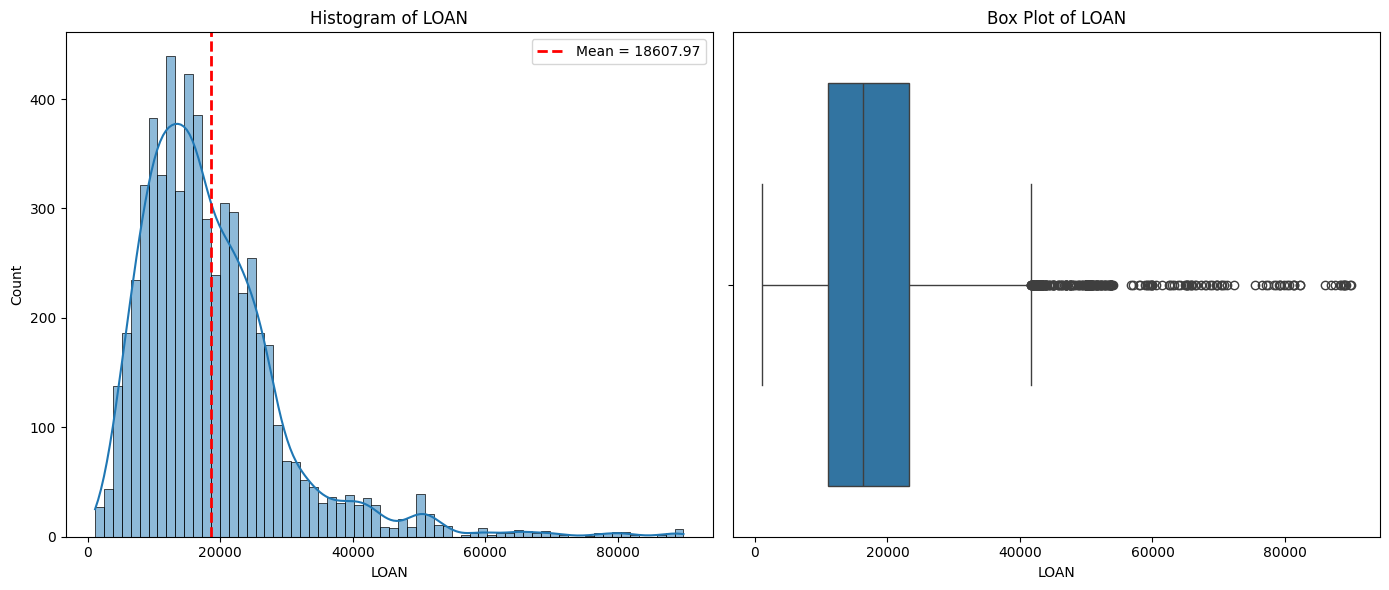

In [38]:
# Histogram and boxplot for the amount of loan approved column
histogram_and_boxplot(df,'LOAN')

In [ ]:
# print the range of values
print(f"The range of loan values is between {df['LOAN'].min()} and {df['LOAN'].max()}. The mean value is {df['LOAN'].mean().round(2)} and the median is {df['LOAN'].median()}.")

The range of loan values is between 1100 and 89900. The mean value is 18607.97 and the median is 16300.0.


Observations:

We can see that we have a right-skewed distribution, with the mean being larger that the median. The box plot also shows many ourliers, though they might prove to still be very important for the analysis.

2. Amount due on the existing mortgage (MORTDUE)

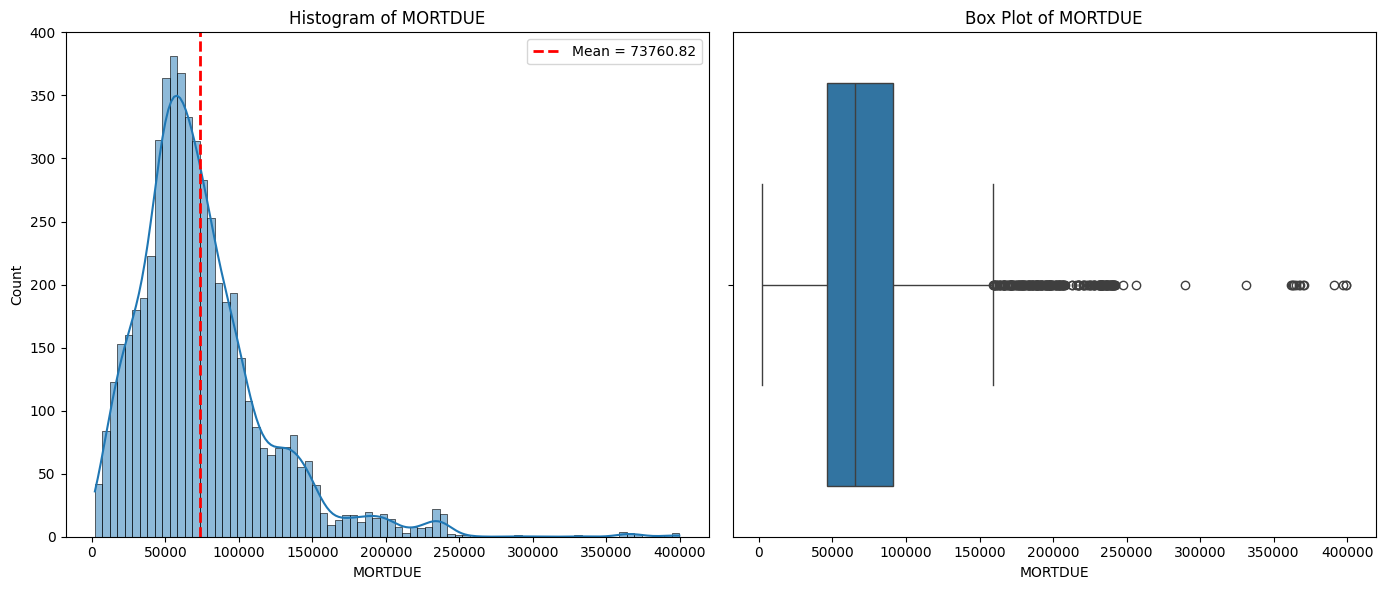

In [ ]:
# Histogram and boxplot for the amount due on the existing mortgage
histogram_and_boxplot(df,'MORTDUE')

In [ ]:
# print the range of values
print(f"The range of mortgage values is between {df['MORTDUE'].min()} and {df['MORTDUE'].max()}. The mean value is {df['MORTDUE'].mean().round(2)} and the median is {df['MORTDUE'].median()}.")

The range of mortgage values is between 2063.0 and 399550.0. The mean value is 73760.82 and the median is 65019.0.


Observations:

We can see that we again have a right-skewed distribution with many outliers. The graphs are similiar to the loan ammount which makes sense as higher value properties are more likely to get a larger loan.

3. Current value of the property (VALUE)

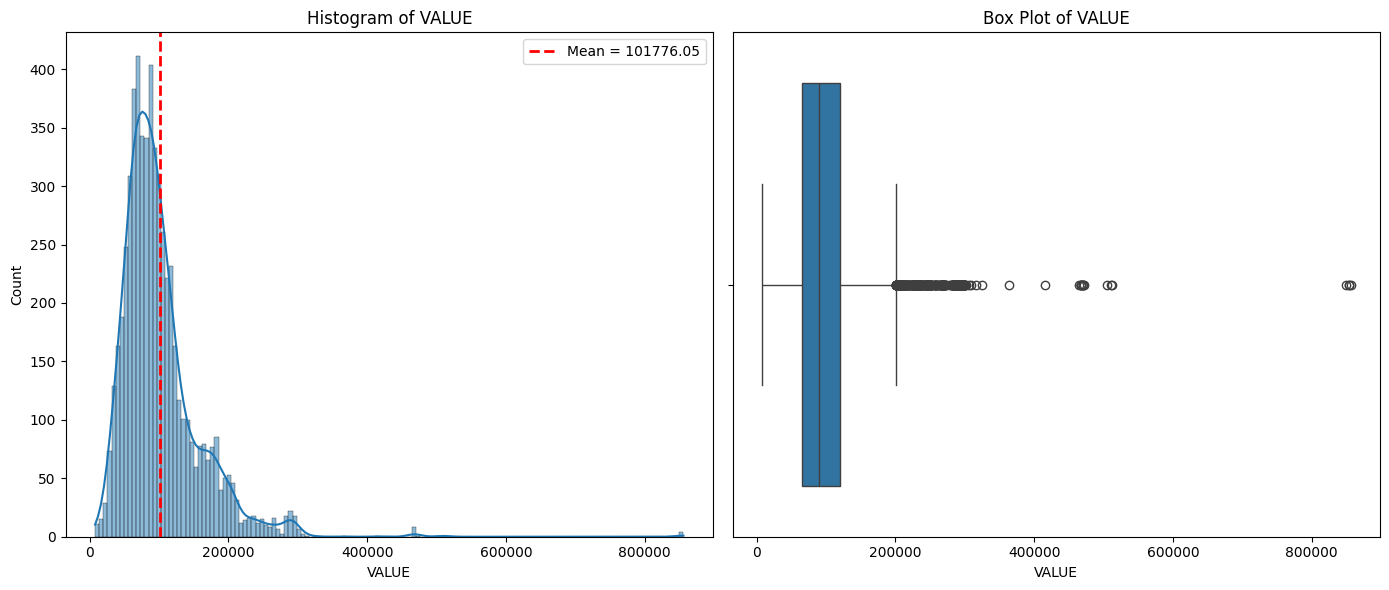

In [ ]:
# Histogram and boxplot for the current property value
histogram_and_boxplot(df,'VALUE')

In [ ]:
# print the range of values
print(f"The range of home values is between {df['VALUE'].min()} and {df['VALUE'].max()}. The mean value is {df['VALUE'].mean().round(2)} and the median is {df['VALUE'].median()}.")

The range of home values is between 8000.0 and 855909.0. The mean value is 101776.05 and the median is 89235.5.


Observations:

Similar to the previous two plots, we can see a right-skewed distribution with many outliers. However, we can also note that the variance is relatively smaller, showing that the property values are closer compared to the remaining mortgages or the loan amounts.

4. Reason for the loan request (REASON)

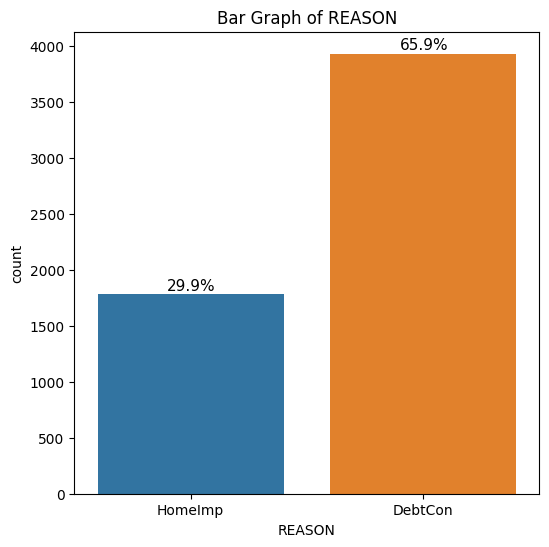

In [ ]:
# Bar graph of the loan request reason
bar_graph(df,'REASON')

Observations:

We can see that about two-thirds of the loans were given for dept consolidation.

5. Type of applicant job (JOB)

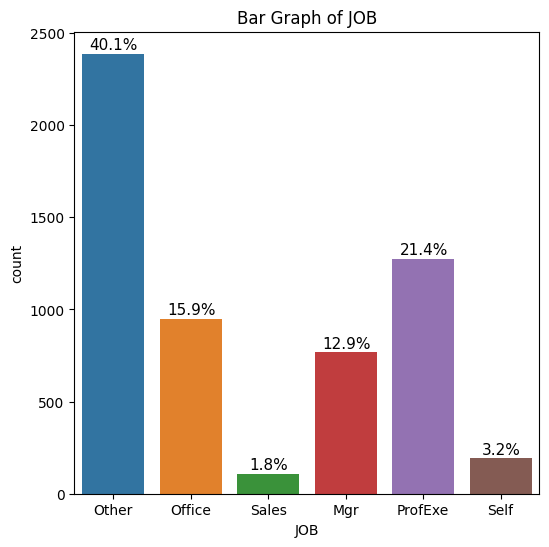

In [ ]:
# Bar graph of the different applicant jobs
bar_graph(df,'JOB')

Observations:

We can see that there are 6 unique types of jobs, most being "Other" at 40%, followed by "ProfExe" at 21.4% and "Office" at 16%.

6. Years at present job (YOJ)

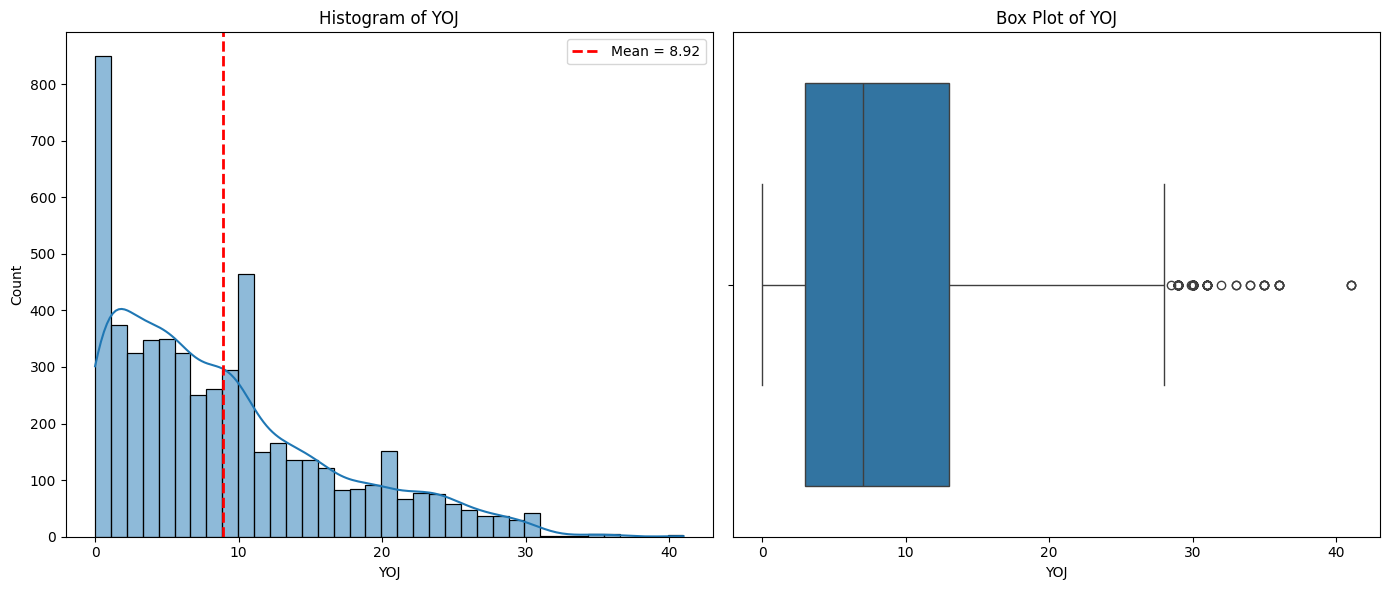

In [ ]:
# Histogram and boxplot for the number of years at current job
histogram_and_boxplot(df,'YOJ')

Observations:

We again have a right-skewed distribution with some outliers beyond 30 years on the job. Again, these could be potentially significant outliers as long-time professionals are probably less likely to default on their loan.

7. Number of major derogatory reports (DEROG)

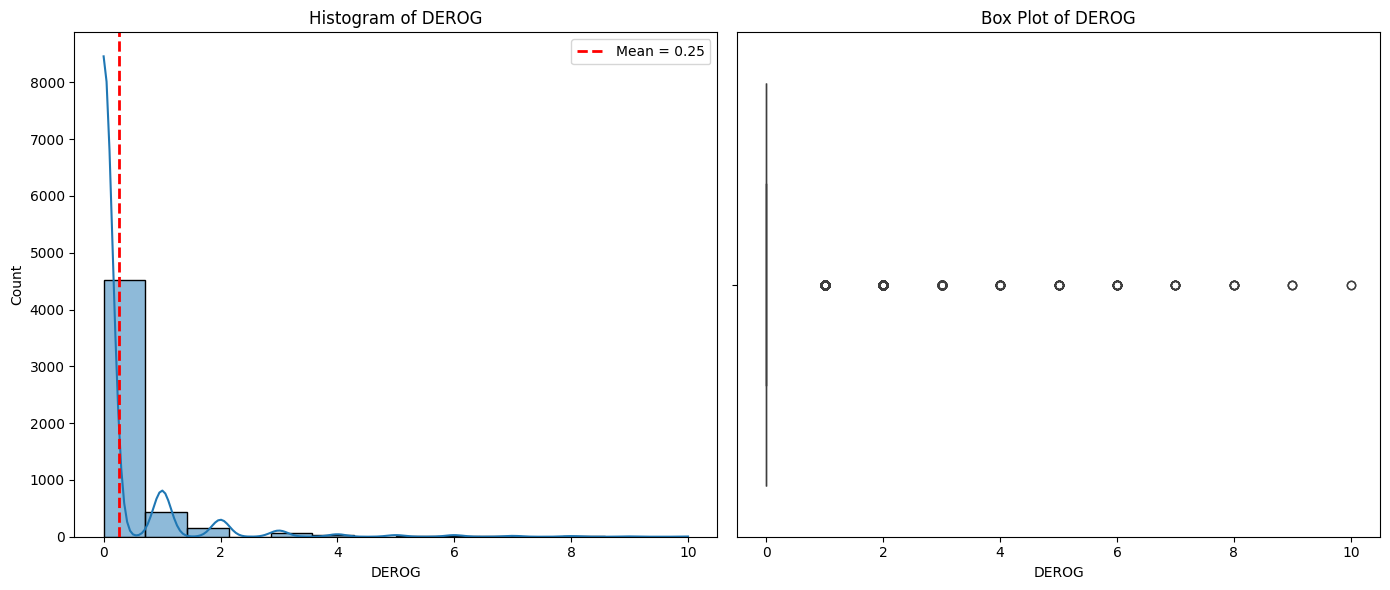

In [ ]:
# Histogram and boxplot for the number of derogatory reports
histogram_and_boxplot(df,'DEROG')

Observations:

Most clients in the data set have 0 derogatory reports against them, which makes sense. It would be logical if those that do have them are more likely to default.

In [ ]:
# Print the number of clients with at least one derogatory report
print(f'There are {df.loc[df["DEROG"]>0].shape[0]} with at least one derogatory report or {round(df.loc[df["DEROG"]>0].shape[0]/df.shape[0]*100,2)} percent of all clients.')

There are 725 with at least one derogatory report or 12.16 percent of all clients.


Observations:

We can see that only 12.2% of clients have any derogatory reports against them.


8. Number of delinquent credit lines (DELINQ)

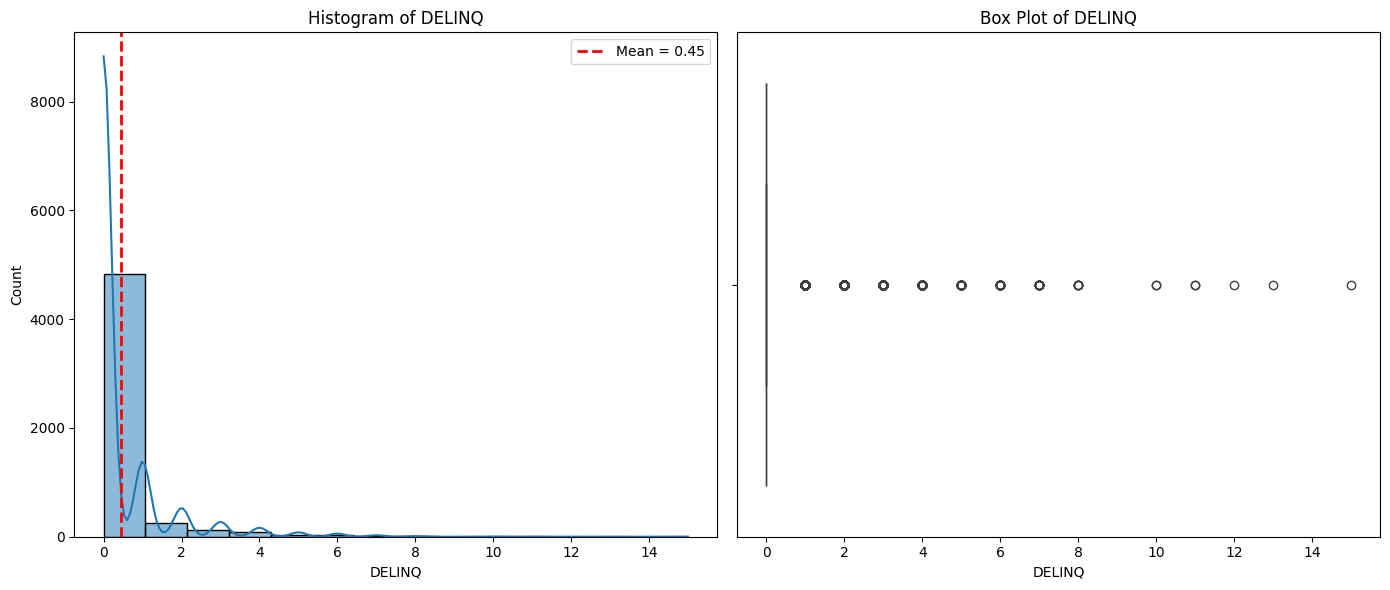

In [ ]:
# Histogram and boxplot for number of delinquent credit lines
histogram_and_boxplot(df,'DELINQ')

Observations:

Similar to the number of derogatory reports, most clients do not have a delinquent line of credit and it is likely that those who do are more likely to default on their loan.

In [ ]:
# Print the number of clients with at least one delinquent line of credit
print(f'There are {df.loc[df["DELINQ"]>0].shape[0]} with at least one delinquent line of credit or {round(df.loc[df["DELINQ"]>0].shape[0]/df.shape[0]*100,2)} percent of all clients.')

There are 1201 with at least one delinquent line of credit or 20.15 percent of all clients.


Observations:

We can see that about 20.2% of clients have a delinquent line of credit, about the same as the number of clients who default.

9. Age of oldest credit line in months (CLAGE)

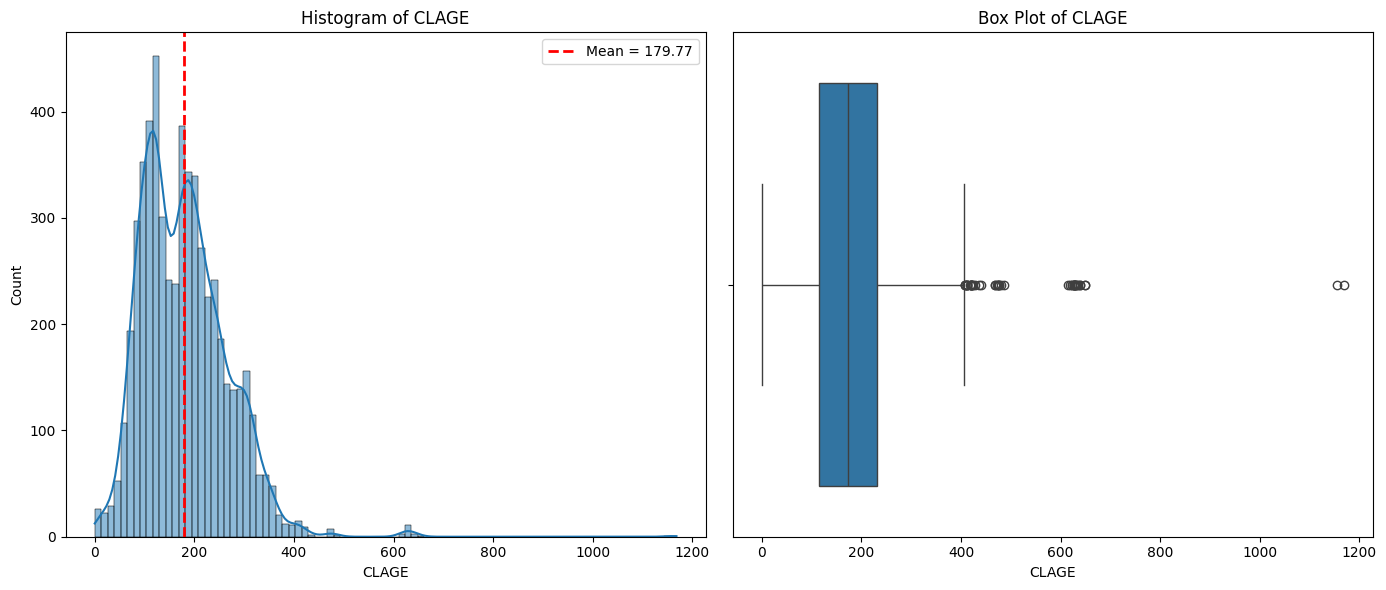

In [ ]:
# Histogram and boxplot for age of oldest credit line
histogram_and_boxplot(df,'CLAGE')

Observations:

The distrbution of ages of the credit lines is also right-skewed, though closer to normal if we ignore the outliers.

10. Number of recent credit inquiries (NINQ)

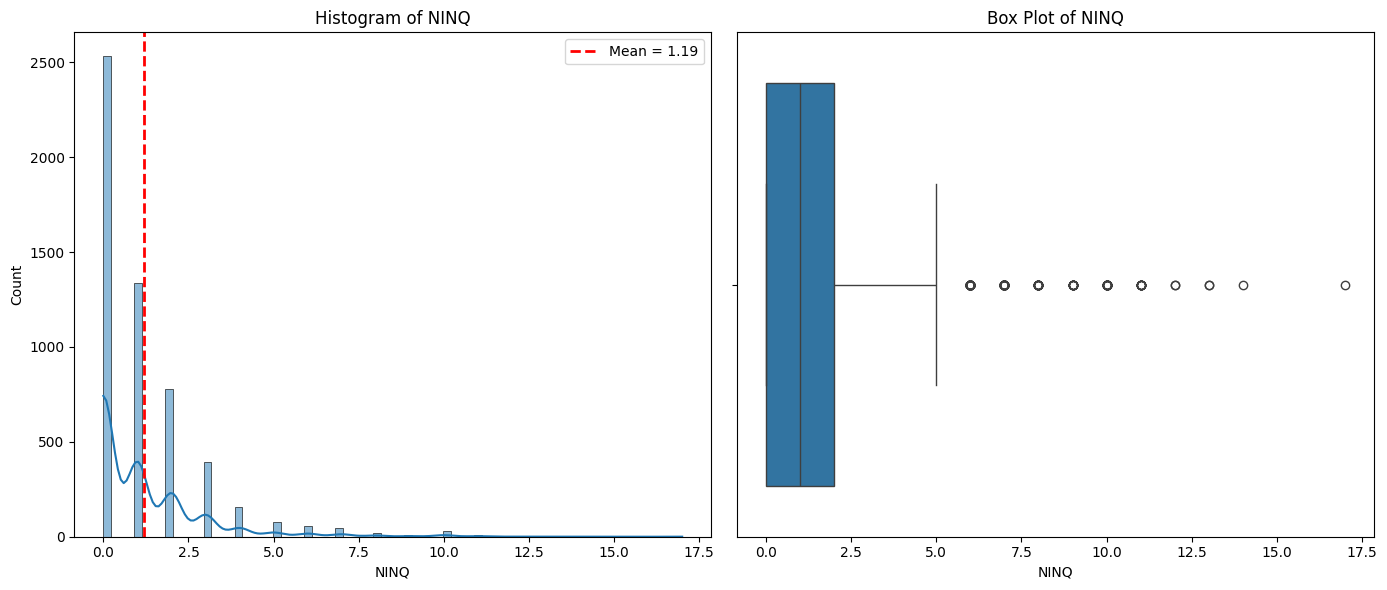

In [ ]:
# Histogram and boxplot for the number of recent credit inquiries
histogram_and_boxplot(df,'NINQ')

Observations:

We can see that even though the number of inquiries is given as a float, the distribution is discrete. We can also see that most clients have 0 inquiries, with some big outliers in the data.

11. Number of existing credit lines (CLNO)

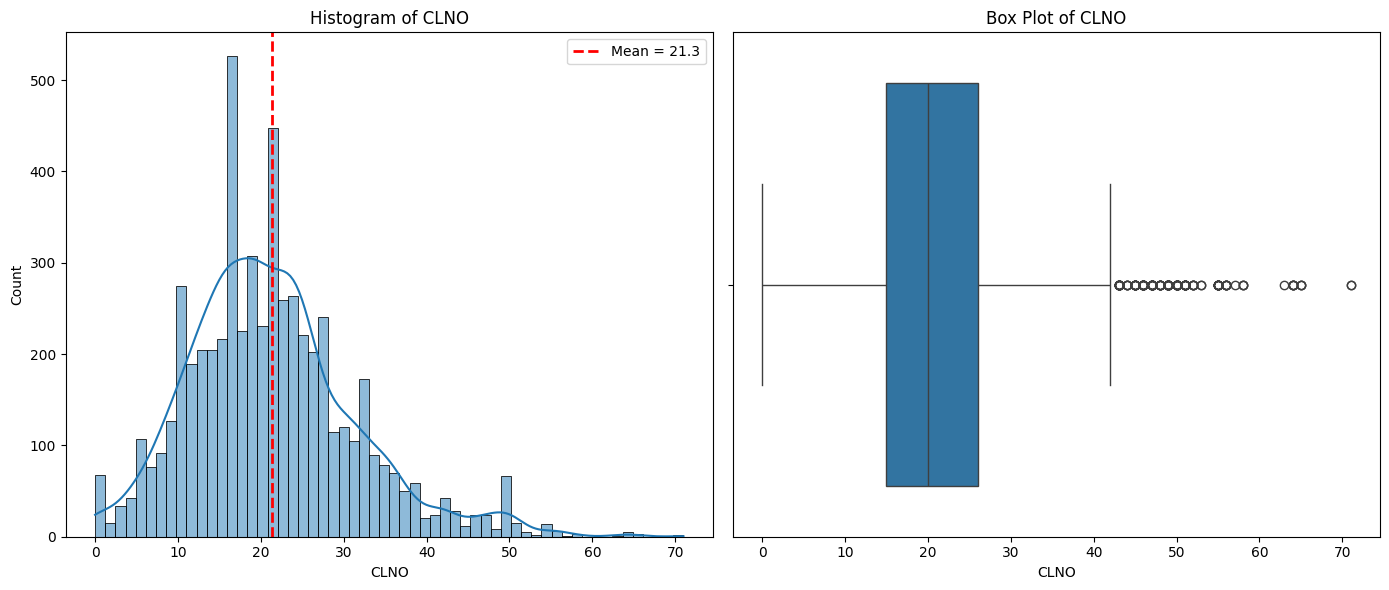

In [ ]:
# Histogram and boxplot for the number of existing credit lines
histogram_and_boxplot(df,'CLNO')

Observations:

The number of existing credit lines is close to normally distributed with some outliers.

12. Debt-to-income ration (DEBTINC)

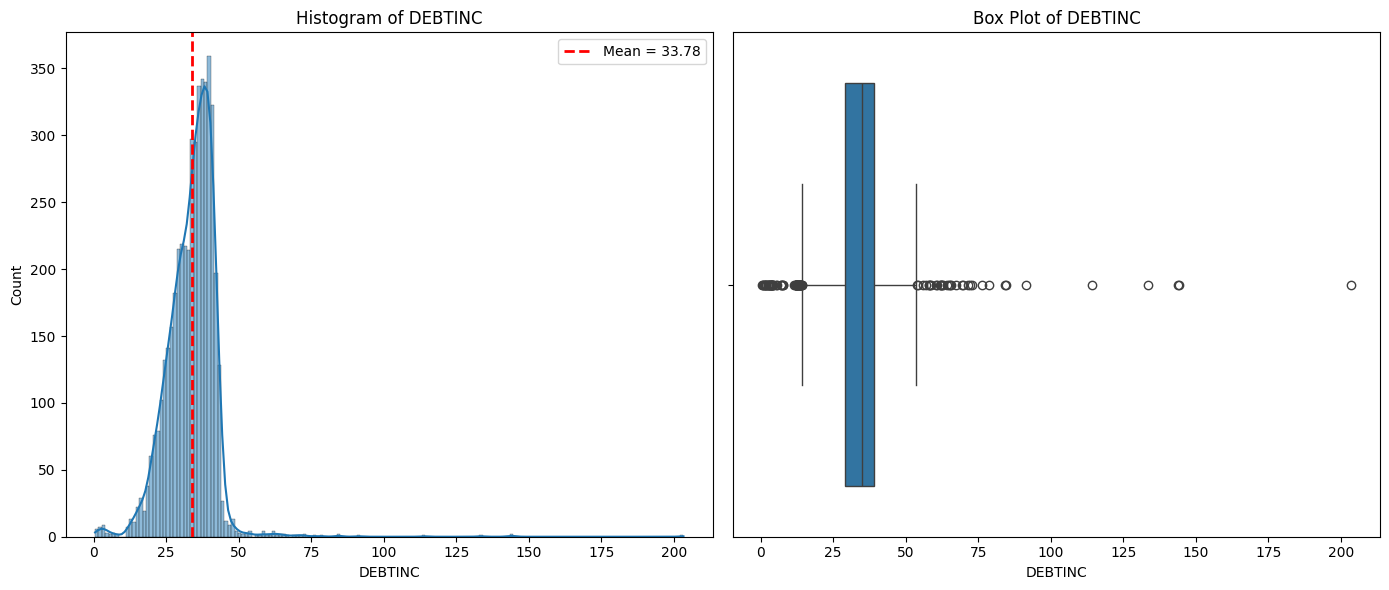

In [ ]:
# Histogram and boxplot for the debt-to-income ratio
histogram_and_boxplot(df,'DEBTINC')

Observations:

Again we see a big number of outliers, this time in both directions.

### **Bivariate Analysis**

For the bivariate analysis, we can focus on how the loan default rate is affected by the different variables. This can help us gain some intuition about how significant they may be to the classification models.

1. Loan default rate for different loan, mortgage and value amounts.

It is logical to think that the amount of money owed has something to do with the default rate so we can check what their relationship is according to the data. The loan amount should also relate to the value of the property and the mortgage due.

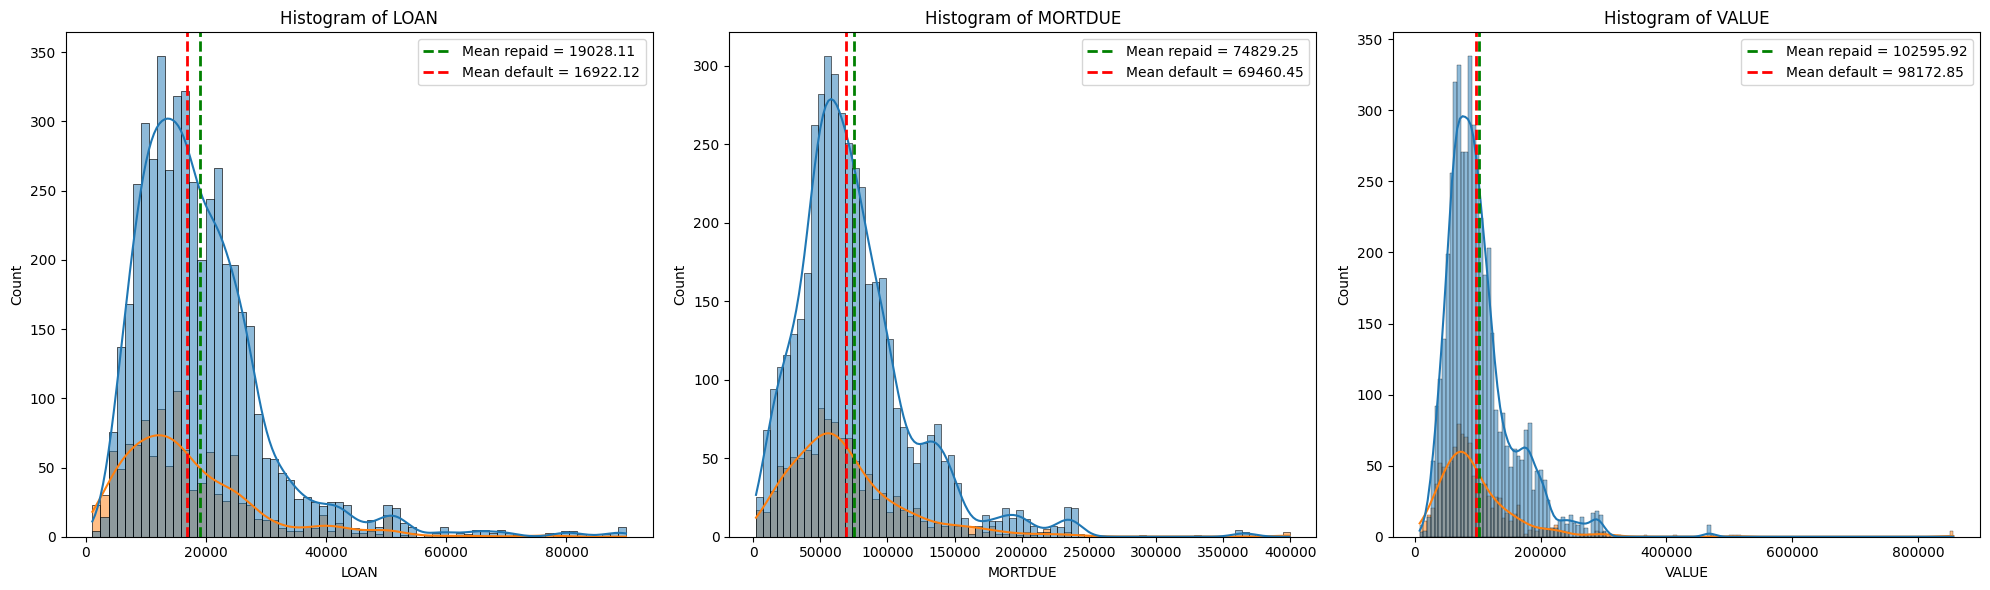

In [ ]:
# Plot the distributions for the different loan, mortgage and value amounts with a hue for the default parameter
i = 0 # defining a dummy counting index
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # defines a 1x3 plot grid to display plots

for column in ["LOAN","MORTDUE","VALUE"]: # loop over the columns we want
    mean_value0 = df.loc[df['BAD']==0][column].mean() # defines the mean value for repaid loans
    mean_value1 = df.loc[df['BAD']==1][column].mean() # defines the mean value for defaulted loans

    # Plot histogram
    sns.histplot(df, x=column, kde=True, hue = "BAD",palette="tab10",ax=axes[i])
    axes[i].axvline(mean_value0, color='green', linestyle='dashed', linewidth=2, label=f"Mean repaid = {round(mean_value0,2)}") # adds a vertical line at the mean value
    axes[i].axvline(mean_value1, color='red', linestyle='dashed', linewidth=2,label=f"Mean default = {round(mean_value1,2)}") # adds a vertical line at the mean value
    axes[i].set_title(f'Histogram of {column}')
    axes[i].legend()
    i = i+1 # update count

plt.tight_layout()
plt.show()

Observations:

We can see that in all cases the distribution for the defaulted loans skews even more to the right. The averages for the loan amount, mortgage owed, and value are all smaller for the defaulted clients, compared to the ones who repaid their loan. The difference is most pronounced for the loan amount, and least pronounced for the property value.

2. Debt to income ratio, credit line age and years on the job effect on default

It seems reasonable that clients who have a lot of debt and little income are more likely to default on their loans so again we can compare the distributions. Similarly, it seems likely that if a client has only recent credit lines, he or she is more likely to default on them. Lastly, we can see whether the yeas on current job have any effect as it would stant to reason that long time professionals are less likely to default on their loans.

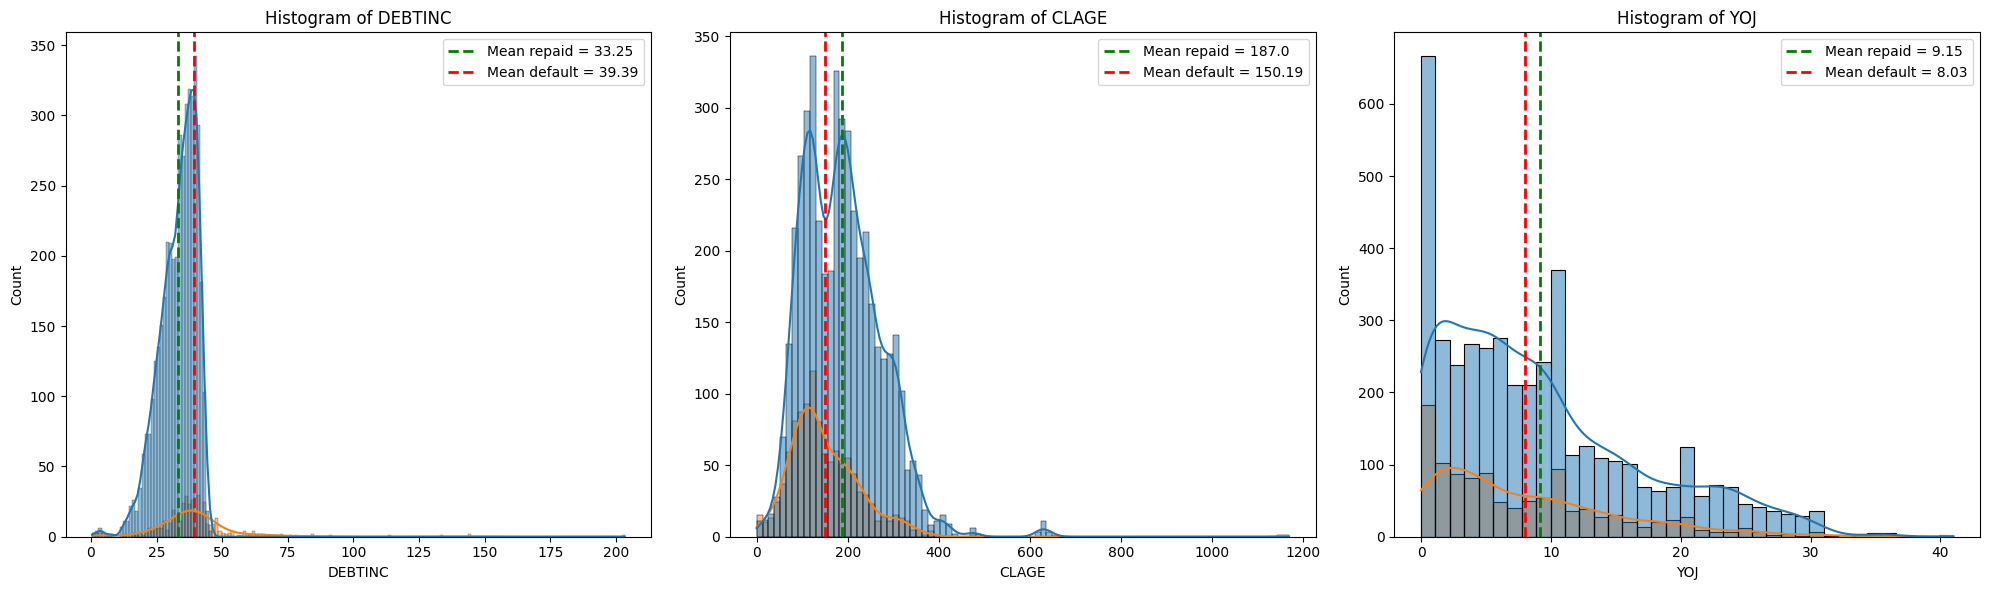

In [ ]:
# Plot the distributions for the different dept-to-income ration, credit line age, and years on job
i = 0 # defining a dummy counting index
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # defines a 1x3 plot grid to display plots

for column in ["DEBTINC","CLAGE","YOJ"]: # loop over the columns we want
    mean_value0 = df.loc[df['BAD']==0][column].mean() # defines the mean value for repaid loans
    mean_value1 = df.loc[df['BAD']==1][column].mean() # defines the mean value for defaulted loans

    # Plot histogram
    sns.histplot(df, x=column, kde=True, hue = "BAD",palette="tab10",ax=axes[i])
    axes[i].axvline(mean_value0, color='green', linestyle='dashed', linewidth=2, label=f"Mean repaid = {round(mean_value0,2)}") # adds a vertical line at the mean value
    axes[i].axvline(mean_value1, color='red', linestyle='dashed', linewidth=2,label=f"Mean default = {round(mean_value1,2)}") # adds a vertical line at the mean value
    axes[i].set_title(f'Histogram of {column}')
    axes[i].legend()
    i = i+1 # update count

plt.tight_layout()
plt.show()

Observations:

We can see that the average dept-to-income ratio for the defaulted loans is indeed higher than the average for the paid off loans. We can also see that the distribution for the age of the credit line for defaulted loans skews more to the right compared to the paid off loans, suggesting that clients with only recent loans are more likely to default. Finally, we can also see that on average, the people who pay off their loans have worked longer at their current position.

3. Loan default rates for different jobs

We can compare how different professions relate to credit defaults.

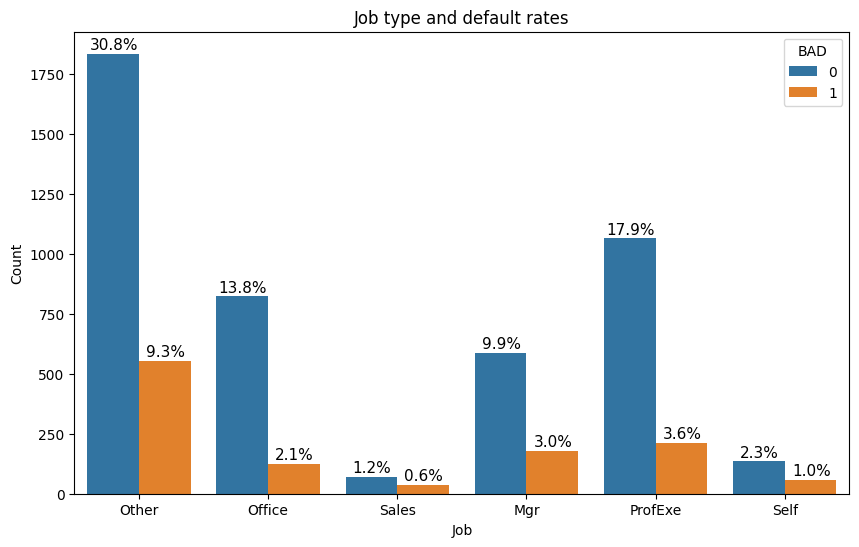

In [ ]:
# Create a countplot for the job type with default rates as a hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(df,x='JOB',hue="BAD")

# Calculate percentages to display on plot
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:  # Only annotate bars with count greater than 0
        percentage = f'{round(count / total * 100,1)}%' # calculates percentage
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0.5, 3),
                    textcoords='offset points') # annotates percentages

# Add title and labels
plt.title('Job type and default rates')
plt.xlabel('Job')
plt.ylabel('Count')

plt.show()

Observations:

We can see that about a third of of sales and self-employed clients default on their loan. Office employees on the other hand show the best ratio.

3. Reason for loan and default rate

We can see whether the reason for the loan has any effect on the default rate.

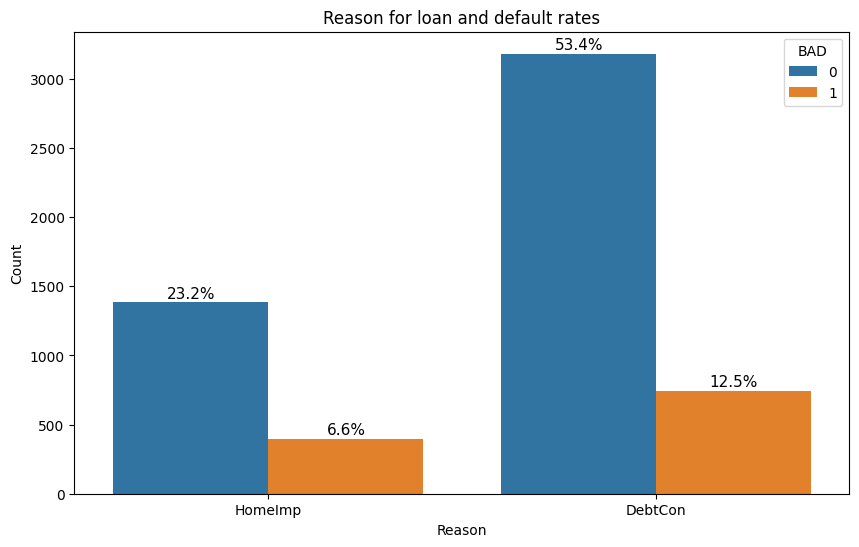

In [ ]:
# Create a countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(df,x='REASON',hue="BAD")

# Calculate percentages to display on plot
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:  # Only annotate bars with count greater than 0
        percentage = f'{round(count / total * 100,1)}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0.5, 3),
                    textcoords='offset points')

# Add title and labels
plt.title('Reason for loan and default rates')
plt.xlabel('Reason')
plt.ylabel('Count')

plt.show()

Observations:

We can see that clients with loans taken for home improvement are relatively more likely to default.

4. Default rate for different derogatory reports, delinquent credit lines and number of inquiries.

It would make sense that clients with derogatory reports, delinquent lines of credit and high number of credit inquiries are more likely to default. We can make plots to check if that bears out in the data.

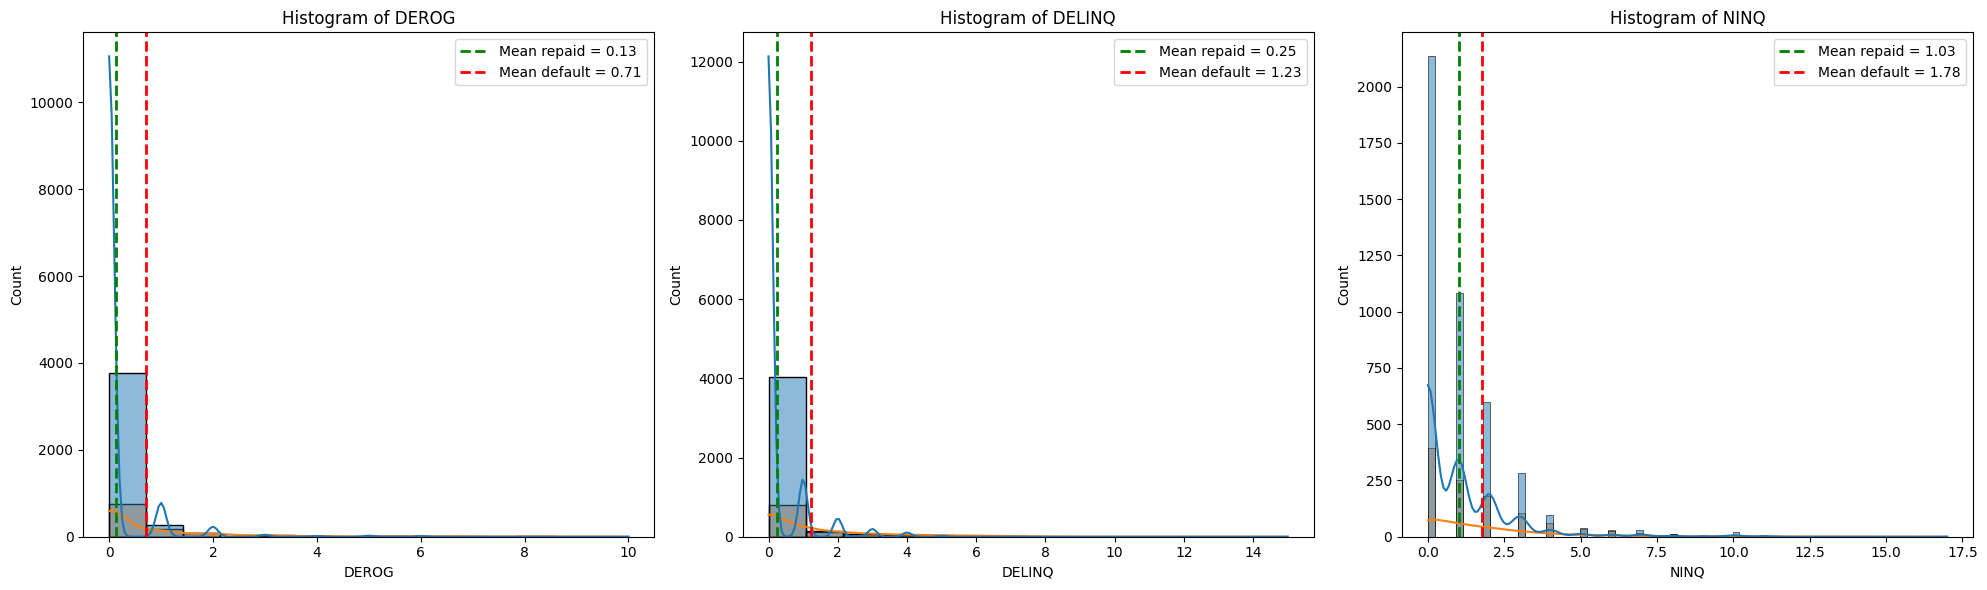

In [ ]:
# Plot the distributions for the different derogatory reports, delinquent credit lines, and number of inquiries with a hue for the default parameter
i = 0 # defining a dummy counting index
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # defines a 1x3 plot grid to display plots

for column in ["DEROG","DELINQ","NINQ"]: # loop over the columns we want
    mean_value0 = df.loc[df['BAD']==0][column].mean() # defines the mean value for repaid loans
    mean_value1 = df.loc[df['BAD']==1][column].mean() # defines the mean value for defaulted loans

    # Plot histogram
    sns.histplot(df, x=column, kde=True, hue = "BAD",palette="tab10",ax=axes[i])
    axes[i].axvline(mean_value0, color='green', linestyle='dashed', linewidth=2,label=f"Mean repaid = {round(mean_value0,2)}") # adds a vertical line at the mean value
    axes[i].axvline(mean_value1, color='red', linestyle='dashed', linewidth=2,label=f"Mean default = {round(mean_value1,2)}") # adds a vertical line at the mean value
    axes[i].set_title(f'Histogram of {column}')
    axes[i].legend()
    i = i+1 # update count

plt.tight_layout()
plt.show()

Observations:

We can see that people who default on the credit have on average close to one derogatory report compared to an average of close to zero for those who do not default. Similarly, clients who default have on average at least 1 delinquent credit line, compared to zero for clients who repaid. We can also see that the average number of credit inquiries is higher for clients who defaulted on their loan.

### **Multivariate Analysis**

Here, we can look at the relationship between all the variables, focusing in particular to the different correlations between the numerical variables.

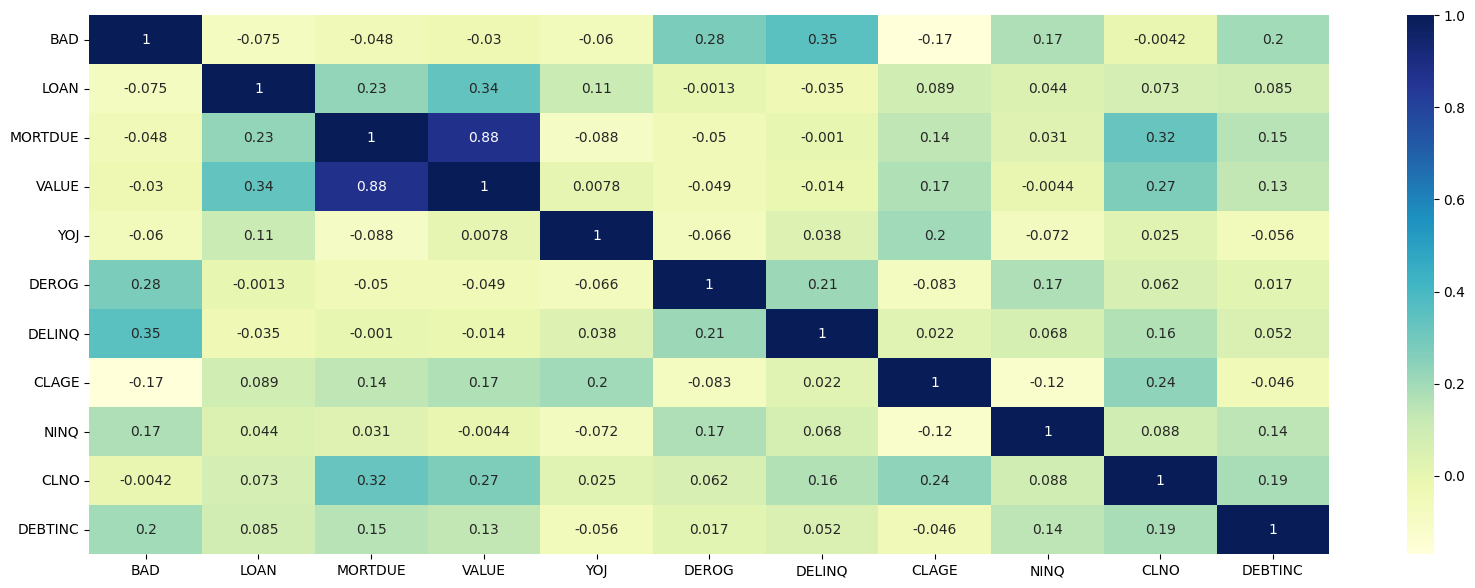

In [ ]:
# Plot all the correlations between the numerical variables
df_num = df.select_dtypes(include=[np.number]) # Defines a smaller data frame of only the numerical columns
plt.figure(figsize=(20,7)) # Makes the plot bigger so there is space for all the labels
sns.heatmap(df_num.corr(),annot=True,cmap='YlGnBu')
plt.show()

Observations:

We can see that the most positively correlated variables to default rate are the number of derogatory reports and delinquent lines of credit, followed by the number of credit inquiries. Loan amount, mortgage owed, and home value are all weakly negatively correlated with default rate, showing that higher loans are in fact slightly less likely to default. The highest negative correlation to the default rate is given by the age of the credit line, suggesting that clients wiht only recent credit lines are more likely to default. As we would expect, we can see the highest correlation overall is between the amount of mortgage owed and the value of the home, as you usually have to take out a larger mortgage to afford a more expensive property.

## **Treating Outliers**

We saw that the box plots showed that most of the columns had outliers. We can check for outliers using z-score (how many standard deviations above or below the mean a value is) or the interquartile range.

In [ ]:
# Define a function to test wether a value is an outlier based on z-score
def detect_outliers_zscore(data, threshold=3):
    data = data[~np.isnan(data)] # ignore the null entries in the data
    z_scores = np.abs((data - data.mean()) / data.std()) # calculate the z score
    outliers = z_scores > threshold # assign True/False based on whether the z score is beyond the chosen threshold
    return outliers

In [ ]:
# Define a function to test wether a value is an outlier based on interquartile range
def detect_outliers_iqr(data, k=1.5):
    data = data[~np.isnan(data)] # ignore the null entries in the data
    q1 = np.percentile(data, 25) # find the first quartile
    q3 = np.percentile(data, 75) # find the third quartile
    iqr = q3 - q1 # define the interquartile range
    lower_bound = q1 - k * iqr # lower bound for chosen k parameter
    upper_bound = q3 + k * iqr # upper bound for chosen k parameter
    outliers = (data < lower_bound) | (data > upper_bound) # assign True/False based on whether the value is within the bounds
    return outliers

We could use either one of these to find outliers but we can be sure a value is an outlier if both methods agree, as z-score assumes a normal distribution, while iqr works well for skewed distributions as well. Therefore we can count the number of values that are considered outliers by both methods:

In [ ]:
# Print the number of values in each column which are outliers according to both z-score and iqr
for col in list(df_num.drop("BAD",axis=1).columns):
  true_outlier = (detect_outliers_zscore(df[col]) == True) & (detect_outliers_iqr(df[col]) == True) # only counts outliers determined by both methods
  print(f'There are {true_outlier.sum()} outliers in column {col} according to both z-score and iqr.')

There are 95 outliers in column LOAN according to both z-score and iqr.
There are 88 outliers in column MORTDUE according to both z-score and iqr.
There are 89 outliers in column VALUE according to both z-score and iqr.
There are 18 outliers in column YOJ according to both z-score and iqr.
There are 130 outliers in column DEROG according to both z-score and iqr.
There are 168 outliers in column DELINQ according to both z-score and iqr.
There are 30 outliers in column CLAGE according to both z-score and iqr.
There are 121 outliers in column NINQ according to both z-score and iqr.
There are 42 outliers in column CLNO according to both z-score and iqr.
There are 59 outliers in column DEBTINC according to both z-score and iqr.


As exprected, we have some outliers in each column of the data set. We can use Windsorization to reduce the effect of these values, while being conservative as to not affect the data set too much. We can define a new data frame with subdued outliers and compare the results. For this project we will choose to limit outliers by 1% on both ends.

In [ ]:
# Define copy of data frame
windsorized_df = df.copy()

In [ ]:
# Import function
from scipy.stats.mstats import winsorize

# Apply Winsorization to selected columns
for column in df_num.drop("BAD", axis=1).columns:
    # Separate non-null values
    non_null_values = df_num[column].dropna()

    # Apply winsorization to non-null values
    windsorized_values = winsorize(non_null_values, limits=[0.01, 0.01]) # cutoff the lowest and highest 1% of data

    # Replace the non-null values in the original dataframe with the winsorized values
    windsorized_df.loc[non_null_values.index, column] = windsorized_values

In [ ]:
# Print the number of values in each column which are outliers according to both z-score and iqr
for col in list(df_num.drop("BAD",axis=1).columns):
  true_outlier = (detect_outliers_zscore(windsorized_df[col]) == True) & (detect_outliers_iqr(windsorized_df[col]) == True)
  print(f'There are {true_outlier.sum()} outliers in column {col} according to both z-score and iqr in the windsorized data set.')


There are 133 outliers in column LOAN according to both z-score and iqr in the windsorized data set.
There are 108 outliers in column MORTDUE according to both z-score and iqr in the windsorized data set.
There are 122 outliers in column VALUE according to both z-score and iqr in the windsorized data set.
There are 0 outliers in column YOJ according to both z-score and iqr in the windsorized data set.
There are 130 outliers in column DEROG according to both z-score and iqr in the windsorized data set.
There are 168 outliers in column DELINQ according to both z-score and iqr in the windsorized data set.
There are 0 outliers in column CLAGE according to both z-score and iqr in the windsorized data set.
There are 121 outliers in column NINQ according to both z-score and iqr in the windsorized data set.
There are 0 outliers in column CLNO according to both z-score and iqr in the windsorized data set.
There are 0 outliers in column DEBTINC according to both z-score and iqr in the windsorize

We can see that we have entirely removed the outliers for some of the data columns, while for others we have just changed them. We will consider these outliers impactful and perform the analysis while including them.

## **Treating Missing Values**

We also saw that we have a lot of null values in the data set. We can use the SimpleImputer function from sklearn to fill in the missing values. Here, the median strategy is used for numerical values as we had mainly skewed distributions and the mode or most frequent strategy is used for categorical values.

In [ ]:
# Import function
from sklearn.impute import SimpleImputer

In [ ]:
# Treating missing values
windsorized_df_imputed = windsorized_df.copy() # copy of windsorized data

for col in list(df.columns):
  if windsorized_df_imputed[col].dtype == 'object':  # Categorical column
        imputer = SimpleImputer(strategy='most_frequent')
  else:  # Numerical column
        imputer = SimpleImputer(strategy='median')

  # Reshape the column to fit the imputer's requirements
  windsorized_column_data = windsorized_df_imputed[col].values.reshape(-1, 1)

  # Apply imputation
  windsorized_df_imputed[col] = imputer.fit_transform(windsorized_column_data).flatten()

In [ ]:
# Ensure there are no null values in the data now
windsorized_df_imputed.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
# Print the head of the new dataframe
windsorized_df_imputed.head()

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0  1.0  3300.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1  1.0  3300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2  1.0  3300.0  13500.0   26140.0  HomeImp   Other   4.0    0.0     0.0   
3  1.0  3300.0  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4  0.0  3300.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  34.818262  
1  121.833333   0.0  14.0  34.818262  
2  149.466667   1.0  10.0  34.818262  
3  173.466667   1.0  20.0  34.818262  
4   93.333333   0.0  14.0  34.818262

We have imputed values for all null entries in the data and now have a data set with managed outliers and no null values.

## **Important Insights from EDA**

We can make the following observations based on the exploratory data analysis:
- About 20% of the clients in the data defaulted on their loan
- The factors that seem to contribute to the default rate are the number of derogatory reports, the number of delinquent lines of credit, and the number of inquiries.
- On average, defaulting clients also have a higher debt-to-income ratio, though the correlation does not look as strong.
- Some factors that inversely correlate to default rate seem to be the age of the credit line and the years on current job.
- Some jobs also seem more likely to default, for example sales and self-employed clients.
- Lastly, the data also suggests that loans taken for home improvement are more likely to default.

We can carry over these insights when we start building our classification models and compare what we found from EDA to the important features according to the models to see if they line up and are understandable.

## **Model Building**

Having completed the exploratory data analysis, we can now begin building our classification models. As stated earlier, we want the model to be accurate, explainable and unbiased while performing well on the test data. Our target variable is whether or not the client defaults on their loan, given in binary form in the BAD column of the data set. The client defaulting is labeled as 1, so that will be our positive class. The client repaying their loan is labeled as zero, so that will be our negative class. For this problem, there are two types of error that the classification model can make:
1. When a client who would repay their loan is labeled as someone who will not - false positive
2. When a client who would not repay their loan is labeled as someone who will - false negative

While both of these errors represent a loss for the bank, the client defaulting on their loan is the more impactful as defaults can directly reduce the bank's capital, increase regulatory burdens, and harm its reputation. On the other hand, not giving out a loan that would have been repaid represents a missed opportunity but does not result in direct financial loss or potential regulatory penalties. Therefore, we will take a balanced approach to building the model, but pay specific attention to the recall of the positive class as we want to make that as close to 1 as possible to avoid defaults.

Below we will go through the following steps:
- Data preparation - we will need to encode the categorical features
- Partition the data into train and test set - we will use a 70/30 split
- Build the model - we will consider several different models including logistic regression, decision trees, random forest, and extreme gradient boost
- Train the models on the train data
- Test the models on test set
- Tune the models if we have to
- Visualize and try to understand the important factors for each model and quntify its performance

### **Data preparation and splitting**

We can start by encoding the categorical variables and then splitting the data into test and training parts. We will use the windsorized, imputed data.

In [ ]:
# defines a new dataframe, where the categorical variables have been encoded
df_prepared = pd.get_dummies(data = windsorized_df_imputed, columns = windsorized_df_imputed.select_dtypes(exclude=[np.number]).columns.tolist(), drop_first = True)
df_prepared.head()

BAD    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
0  1.0  3300.0  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   
1  1.0  3300.0  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0   
2  1.0  3300.0  13500.0   26140.0   4.0    0.0     0.0  149.466667   1.0   
3  1.0  3300.0  65019.0   89235.5   7.0    0.0     0.0  173.466667   1.0   
4  0.0  3300.0  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0   

   CLNO    DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  JOB_ProfExe  \
0   9.0  34.818262            True       False       True        False   
1  14.0  34.818262            True       False       True        False   
2  10.0  34.818262            True       False       True        False   
3  20.0  34.818262           False       False       True        False   
4  14.0  34.818262            True        True      False        False   

   JOB_Sales  JOB_Self  
0      False     False  
1      False     False  
2      False     False  
3      False     False  
4      False     False

In [ ]:
# Splitting the target variable (status)
X = df_prepared.drop(["BAD"],axis=1)
Y = df_prepared.BAD

In [ ]:
# Splitting the data into a 70:30 train to test ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### **Model evaluation function and feature plot**

We can define a function that will print the evaluation metrics and plot the confusion matrix:

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluates a classification report and prints the performance metrics along with a confusion matrix heatmap.

    Parameters:
    - y_true: The actual labels.
    - y_pred: The predicted labels.
    - model_name: The name of the model (for display purposes).
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall_class_1 = recall_score(y_true, y_pred, pos_label=1) # creating a separate record of the positive class recall as it is what we want to minimize

    # Create a DataFrame for better formatting
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Recall (Class 1)'],
        'Score': [accuracy, precision, recall, f1, recall_class_1]})

    # Print the metrics DataFrame
    print(f"Metrics for {model_name}:")
    display(metrics_df.style.hide())
    print()

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',xticklabels = ['Will Repay', 'Will Default'], yticklabels = ['Will Repay', 'Will Default'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return metrics_df # returns a data frame of the values we want

We will also define a function that plots the importance of the different features on a polar plot:

In [ ]:
# Define the features
features = X.columns

# Convert feature labels to angles
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Define function to create a polar plot
def create_polar_plot(importances, model_name):
    """
    Takes in the feature importances and plots them on a polar plot.

    Parameters:
    - importances: The list of importances according to the model.
    - model_name: The name of the model (for display purposes).
    """
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    values = importances.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'{model_name}')
    ax.fill(angles, values, alpha=0.25)

    # Add feature labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Show the plot
    plt.title('Feature Importances')
    plt.show()

### **Logistic Regression**

We start by using a logistic regression model:

In [ ]:
# Define model
lr = LogisticRegression(class_weight= {0: 0.2, 1: 0.8},random_state=42) # use class_weight because the data set is a bit imbalanced with only 20% belonging to class 1

In [ ]:
# Train the data on the training set
lr.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=42)

In [ ]:
# Make predictions for the training data set and the test data set
Y_lr_train = lr.predict(X_train)
Y_lr_test = lr.predict(X_test)

Metrics for LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=42):


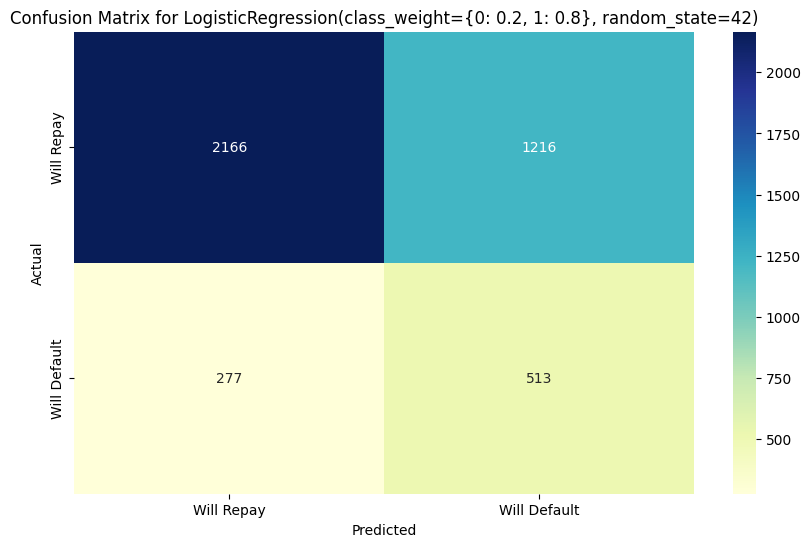

In [ ]:
# Print the model evaluations for the training data
lr_eval_train = evaluate_model(Y_train,Y_lr_train,lr)

Metrics for LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=42):


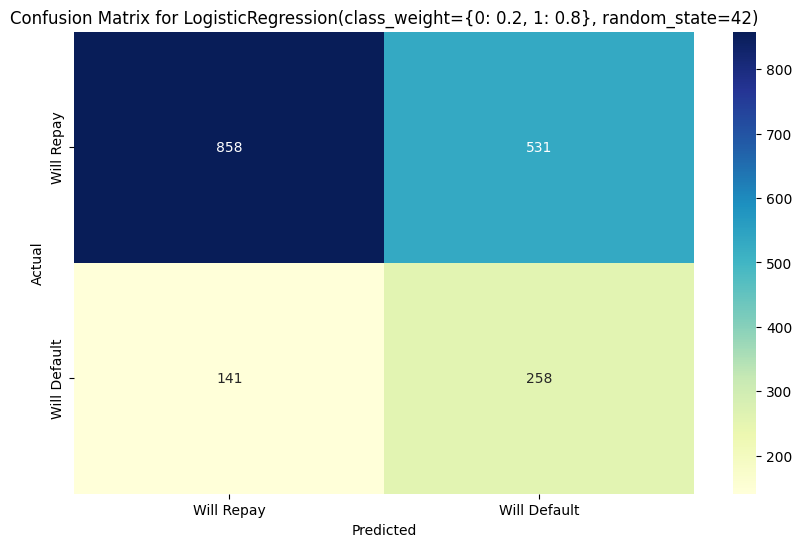

In [ ]:
# Print the model evaluations for the test data
lr_eval = evaluate_model(Y_test,Y_lr_test,lr)

Observations:

We can see that the performance in the model is not great on either the training data or the test data. We can make a coefficient plot to visualize the importance of the different features.

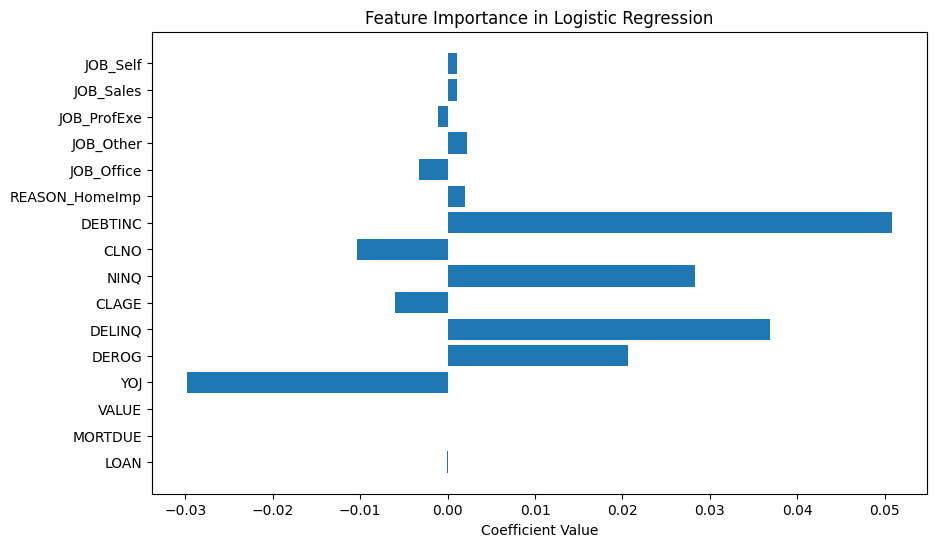

In [ ]:
# Get coefficients
coefficients = lr.coef_[0]
features = X.columns

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

Observations:

We can see that the debt-to-income ratio, the number of inquiries, number of delinquent credit lines and number of derogatory reports are all important features that increase the likelihood of defaulting on the loan, as expected from EDA. Years on the current job and age of credit line are the factors that most contribute to the likelihood of repaying the loan.

#### **Logistic Regrssion Model Improvement**

For logistic regression, the relative scale of the variables are important so we can try scaling the data to improve the performance of the model. We can do this using StandardScaler:

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train logistic regression model on standardized data
lr_scaled = LogisticRegression(class_weight={0:0.2,1:0.8},random_state=42)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=42)

In [ ]:
# Make predictions for the training data set and the test data set
Y_lr_train_scaled = lr_scaled.predict(X_train_scaled)
Y_lr_test_scaled = lr_scaled.predict(X_test_scaled)

Metrics for LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=42):


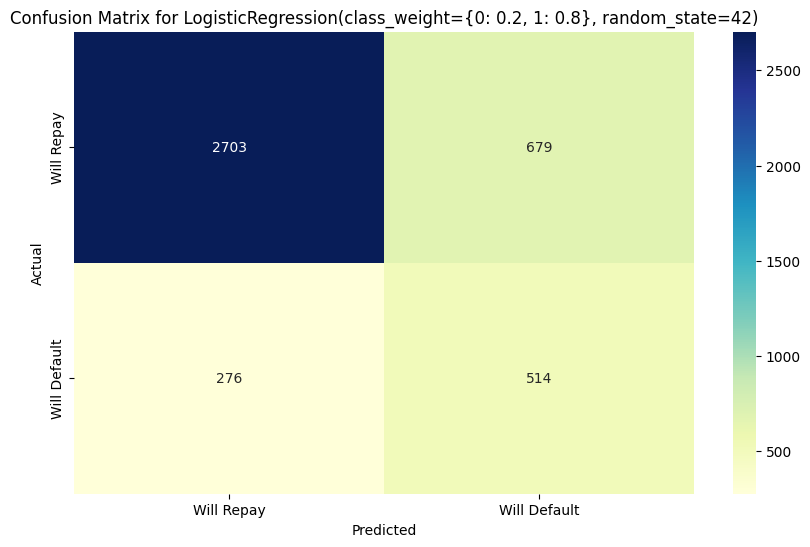

In [ ]:
# Print the model evaluations for the training data
lr_scaled_eval_train = evaluate_model(Y_train,Y_lr_train_scaled,lr_scaled)

Metrics for LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=42):


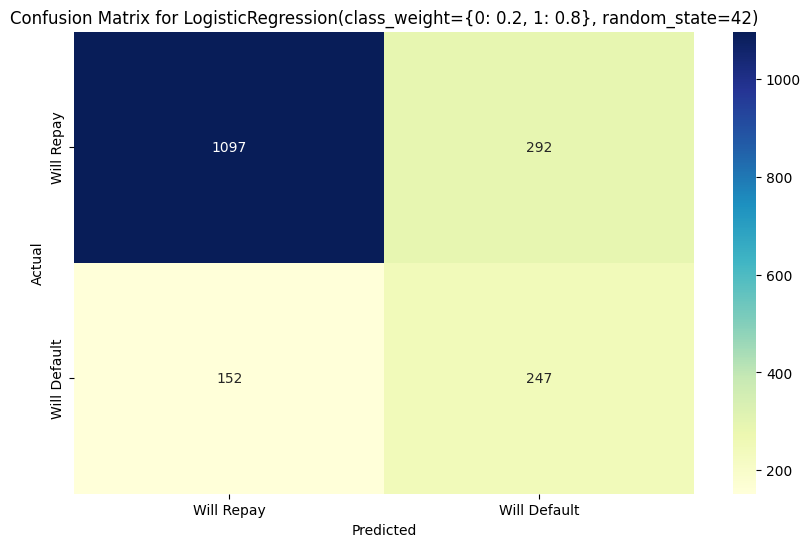

In [ ]:
# Print the model evaluations for the training data
lr_scaled_eval = evaluate_model(Y_test,Y_lr_test_scaled,lr_scaled)

Observations:

While still not ideal, scaling the data significantly improved the performance of the model on both the training and test data. We can again plot the important features to see if there are any differences.

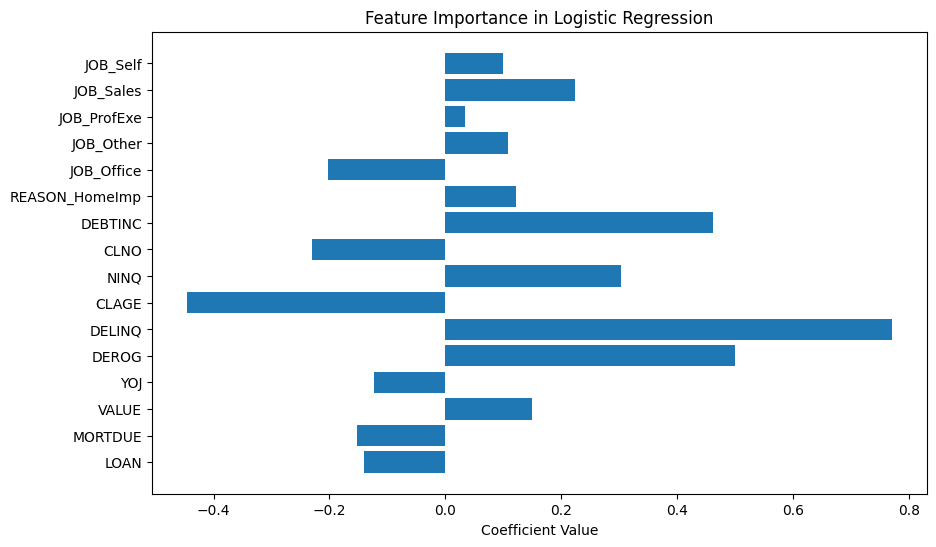

In [ ]:
# Get coefficients
coefficients = lr_scaled.coef_[0]
features = X.columns

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

Observations:

We can see that the importance of the years on the job feature was greatly reduced by the scaling. In addition, the number of deniquent lines of credit has become the most significant feature increasing the likelihood of default, in line with our expectations from EDA. Also expected from EDA, we can see that sales jobs and self-employment have become significant factors towards defaulting. Overall, while we can gain some intuition from the logistic regression model and can understand its decision making, its performance is not satisfactory as all of the metrics are below 80%.

### **Decision Tree**

We can next try a decision tree classifier. The benefit of a decision tree is that it does not require scaling of the features and it can be easily visualized and understood.

In [ ]:
# Define the classifier
dt = DecisionTreeClassifier(class_weight= {0: 0.2, 1: 0.8},random_state=42) # use class_weigth due to imbalance in the data

In [ ]:
# Train the data on the training set
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

In [ ]:
# Make the predictions for the training data and the test data
Y_dt_train = dt.predict(X_train)
Y_dt_test = dt.predict(X_test)

Metrics for DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42):


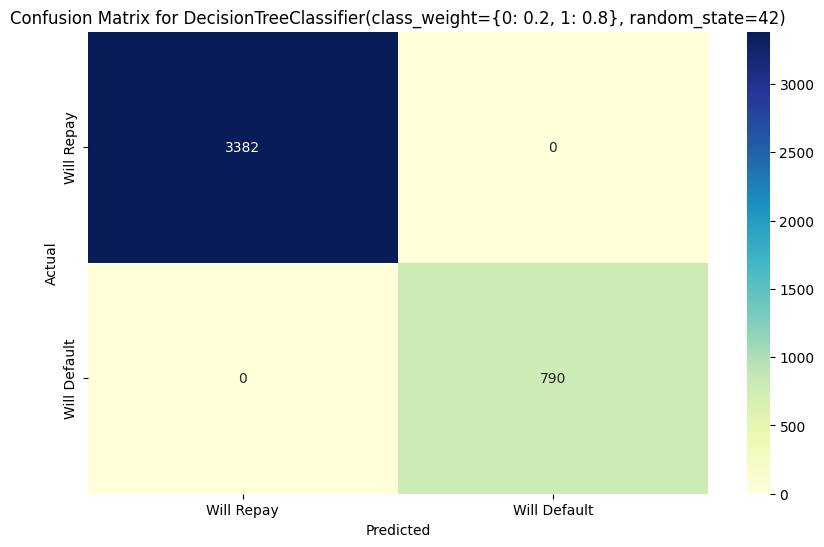

In [ ]:
# Print the model evaluations for the training data
dt_eval_train = evaluate_model(Y_train,Y_dt_train,dt)

Metrics for DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42):


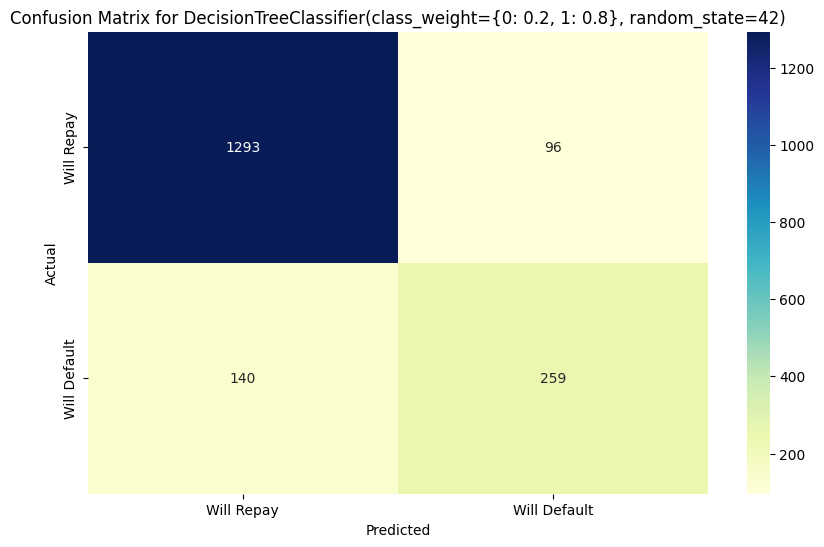

In [ ]:
# Print the model evaluations for the test data
dt_eval = evaluate_model(Y_test,Y_dt_test,dt)

Observations:

We can see that the performance of the decision tree model is perfect on the training data and better than logistic regression on the test data. However the gap between training data and test data is big so there is probably some overfitting. Also we get a high value for the recall of the positive class, which is something we wish to minimize. The practical reason for this is likely that the data set is imbalanced, meaning that the models that lean heavily into the negative class will perform well overall as the chance of default is already low. We can plot the decision three to get a better understanding of the types of nodes we have.

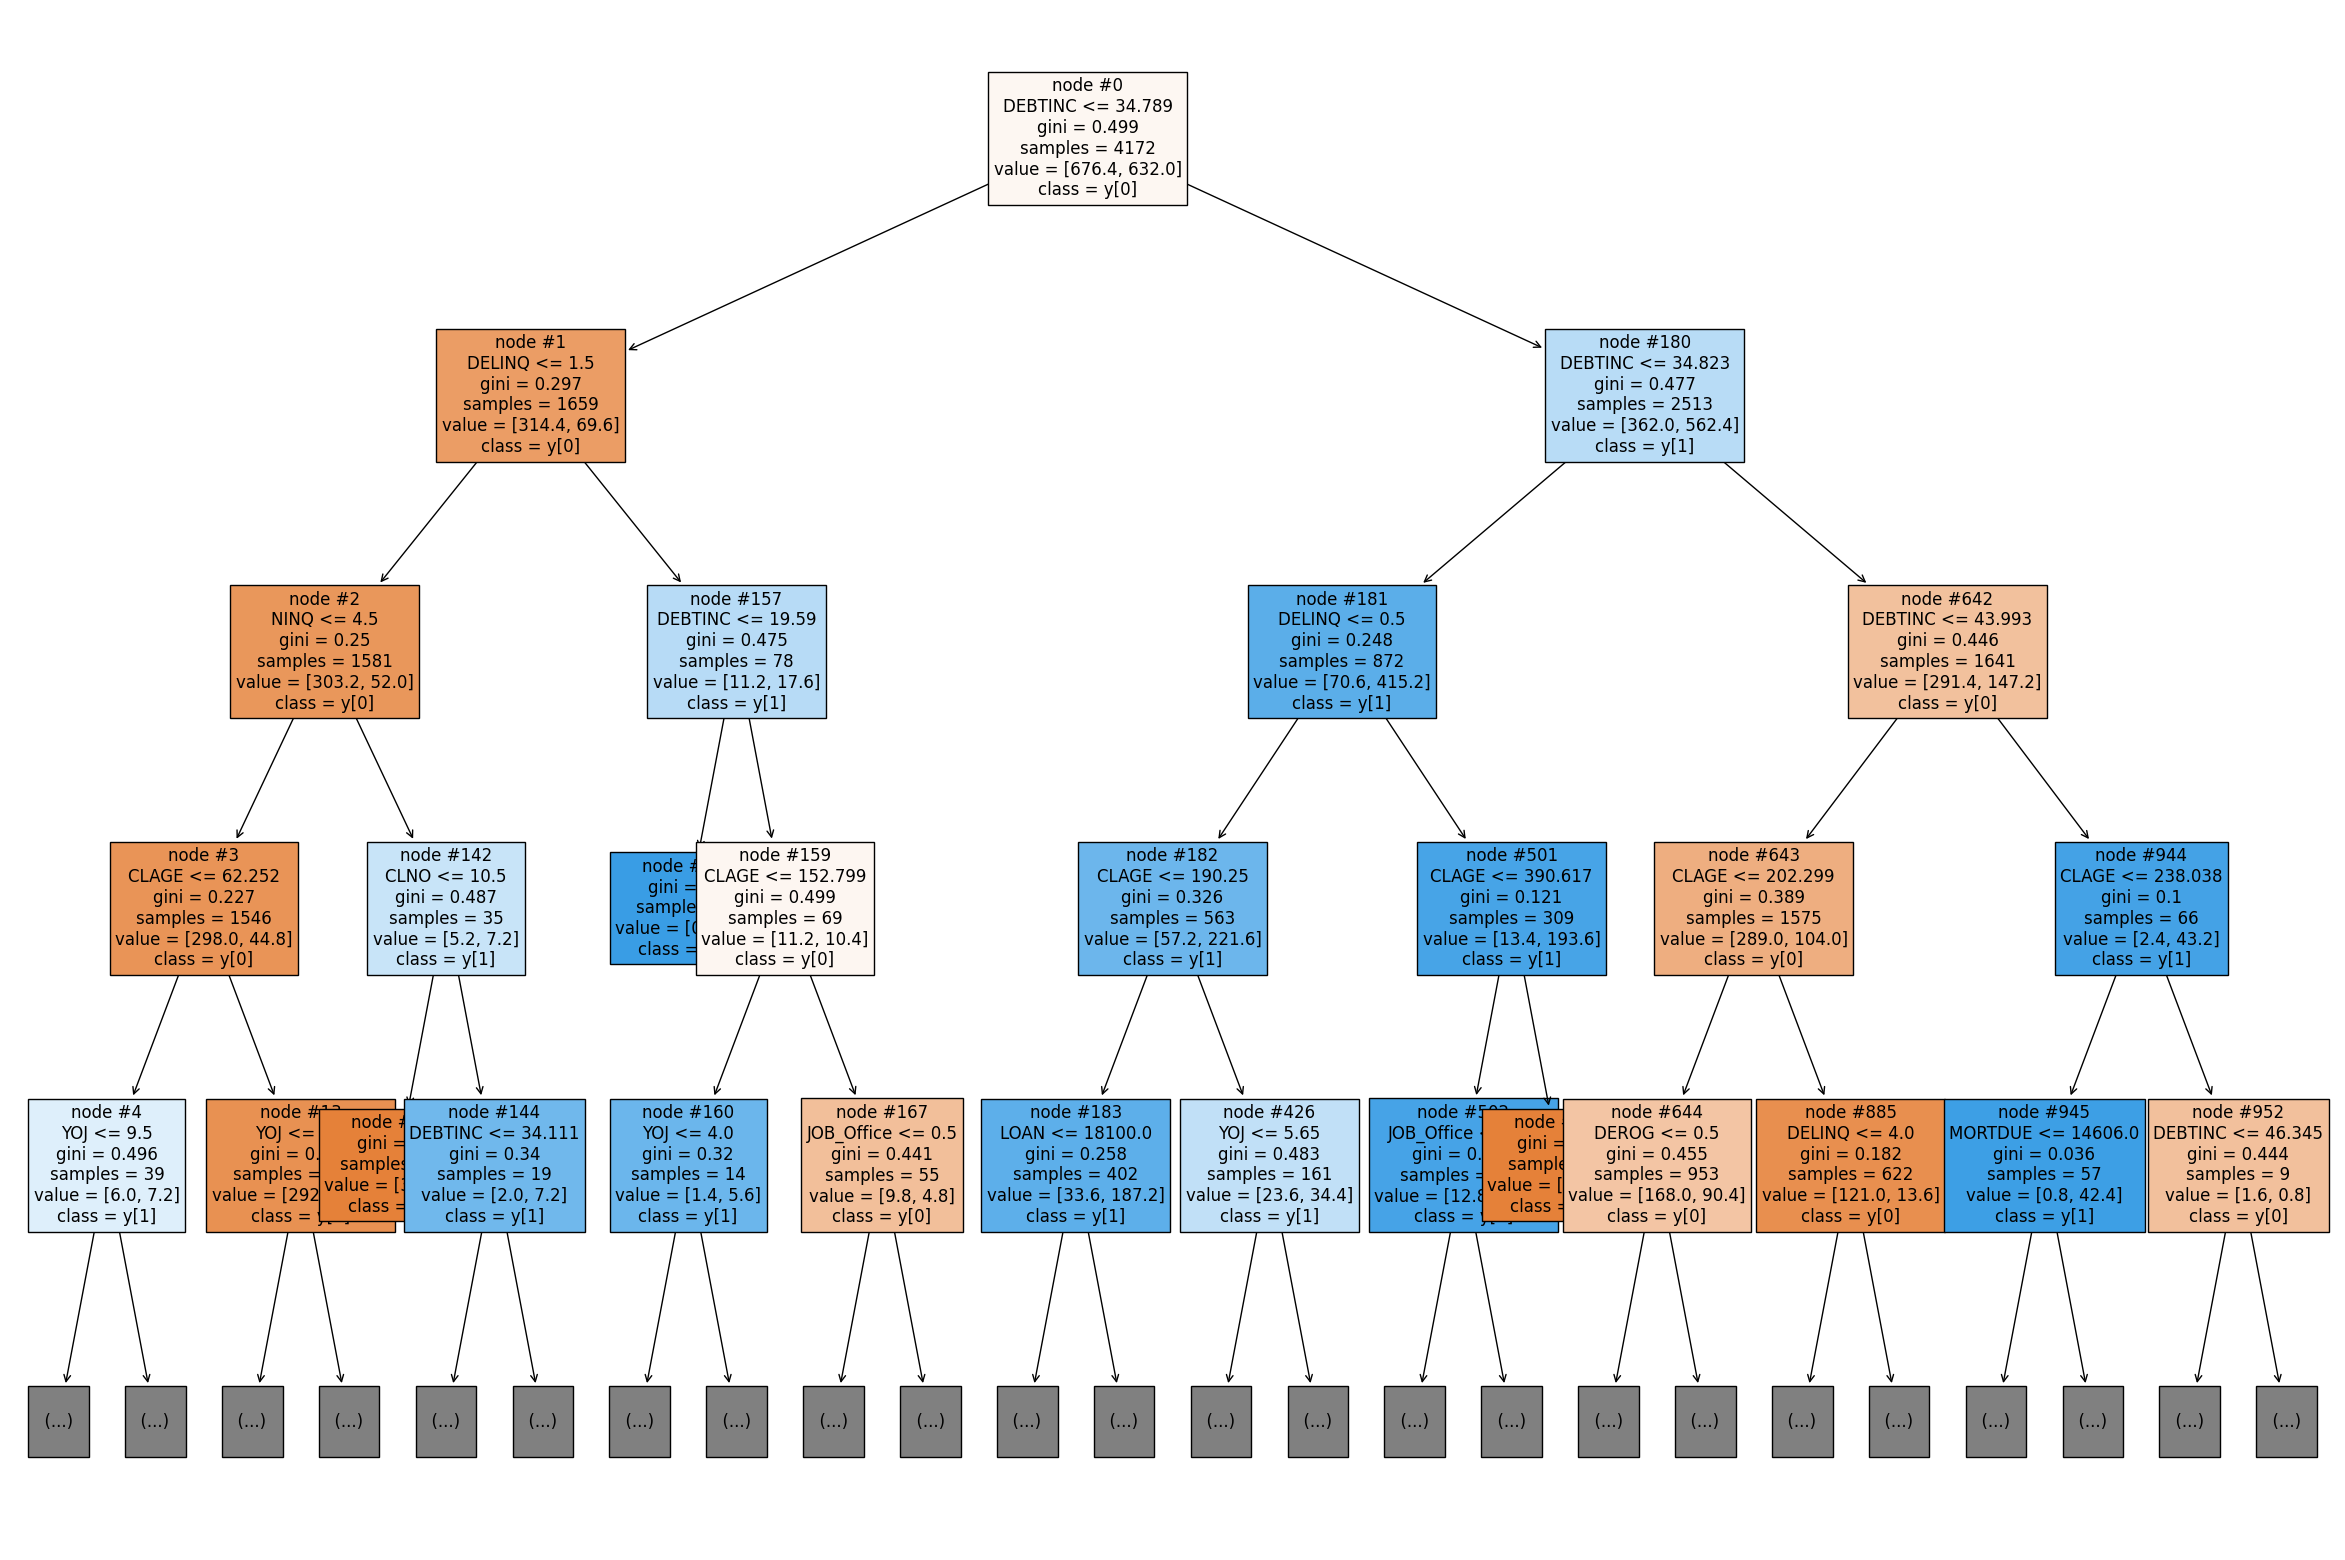

In [ ]:
# Plot the decision tree model
plt.figure(figsize = (30, 20))
plot_tree(dt, max_depth = 4, feature_names = X.columns.tolist(), filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

We can see that the first node has to do with the debt-to-income ratio, followed by the number of delinquent credit lines, in agreement with the features we expect to be important. We can see, however, that we have far too many branches and the model is overfitting the training data. Before addressing the overfitting, we can also plot the important features for the decision tree model.

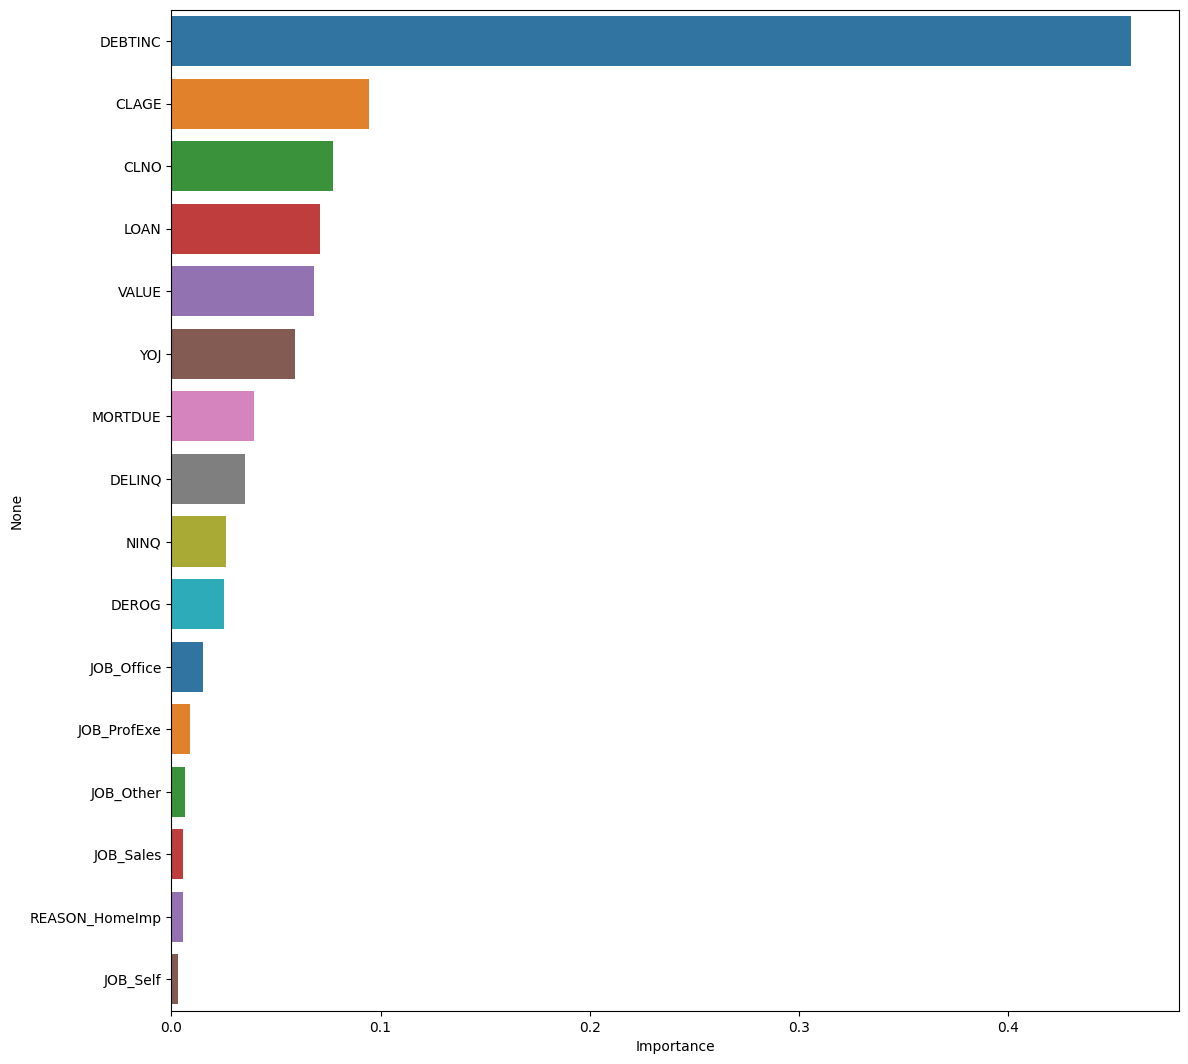

In [ ]:
# Plot the important features
importances = dt.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

We can also visualize the importances on a polar plot

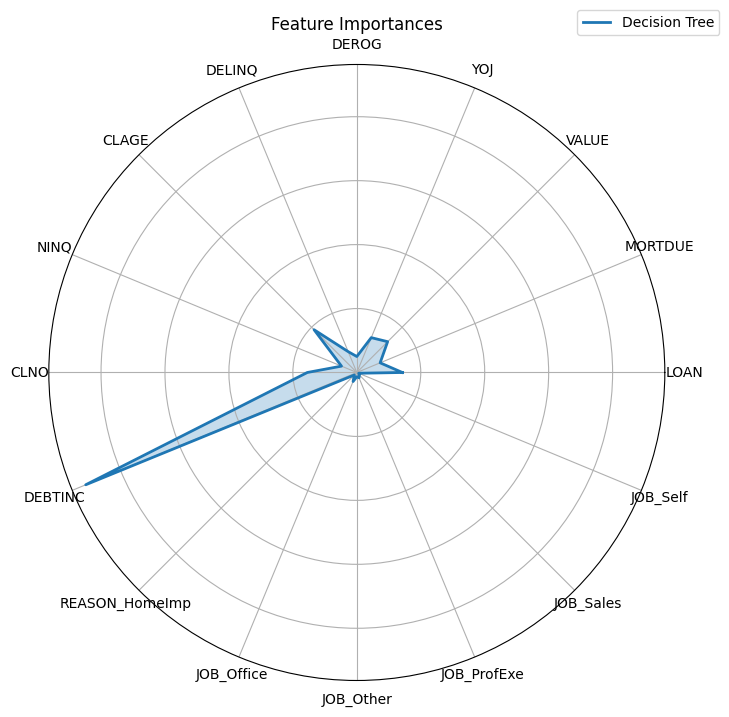

In [ ]:
# Show the polar plot
create_polar_plot(importances, 'Decision Tree')

Observations:

We can see that the model considers the debt-to-income ratio to be most important, followed by the age of the oldest credit line. This is somewhat surprising, given that we expect number of delinquent credits and derogatory reports to heavily correlate with default rate. The decision tree currently is weighing heavily the positive effect of the age of the credit lines. Next, we can try to fix the overfitting of the model and improve the recall by using hyperparameter tuning.

#### **Hyperparameter Tuning**

We can try to improve the performance of the decision tree classifier by performing hyperparameter tuning using GridSearchCV.

In [ ]:
# Perform hyperparameter tuning on a decision tree classifier
dt_tuned = DecisionTreeClassifier(class_weight={0: 0.2, 1:0.8},random_state = 42) # initilize the classifier

# Grid of parameters to choose from
parameters = {'max_depth': [None,2,3,4,5],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [2, 5, 10, 15],
              'max_features': [None,'sqrt','log2']
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1) # we will score the fit based on the recall of the positive class

# Run the grid search
gridCV = GridSearchCV(dt_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, Y_train)

# Set the classifier to the best combination of parameters
dt_tuned = gridCV.best_estimator_

In [ ]:
# Make the predictions for the training data and the test data
Y_dt_tuned_train = dt_tuned.predict(X_train)
Y_dt_tuned_test = dt_tuned.predict(X_test)

Metrics for DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       min_samples_leaf=15, random_state=42):


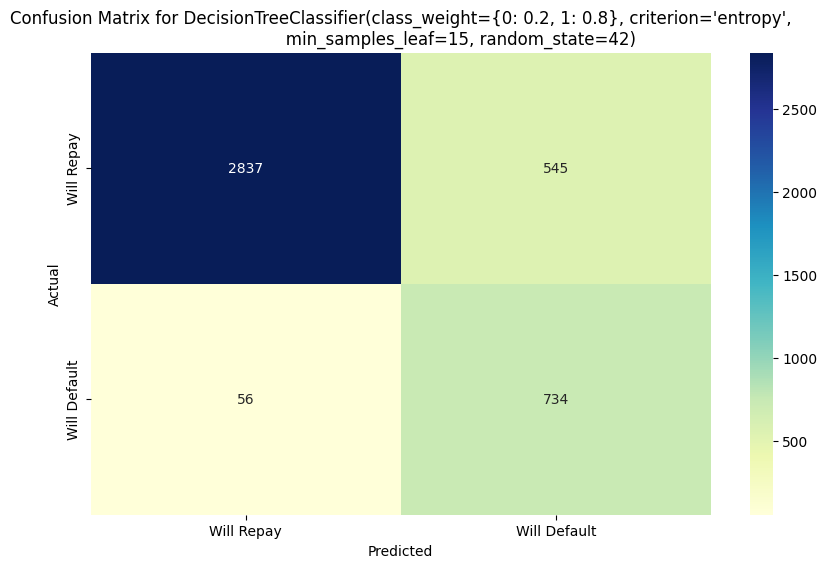

In [ ]:
# Print the model evaluations for the training data
dt_tuned_eval_train = evaluate_model(Y_train,Y_dt_tuned_train,dt_tuned)

Metrics for DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       min_samples_leaf=15, random_state=42):


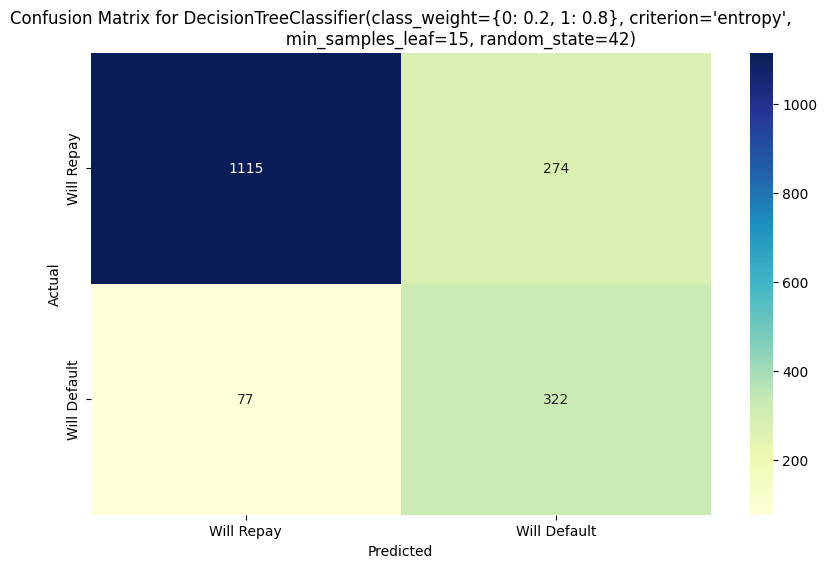

In [ ]:
# Print the model evaluations for the test data
dt_tuned_eval = evaluate_model(Y_test,Y_dt_tuned_test,dt_tuned)

Observations:

We can see that the model is no longer performing perfectly on the training data, but performs evenly on the training and test data. This suggests that the model is now no longer overfitting the training data. While the performance on the overall accuracy, precision, recall and f1 score have gone down, the recall on the positve class has improved significantly, which is what we want as those types of errors are most costly to the banks. We can visualize the tuned decision tree to understand the splits.

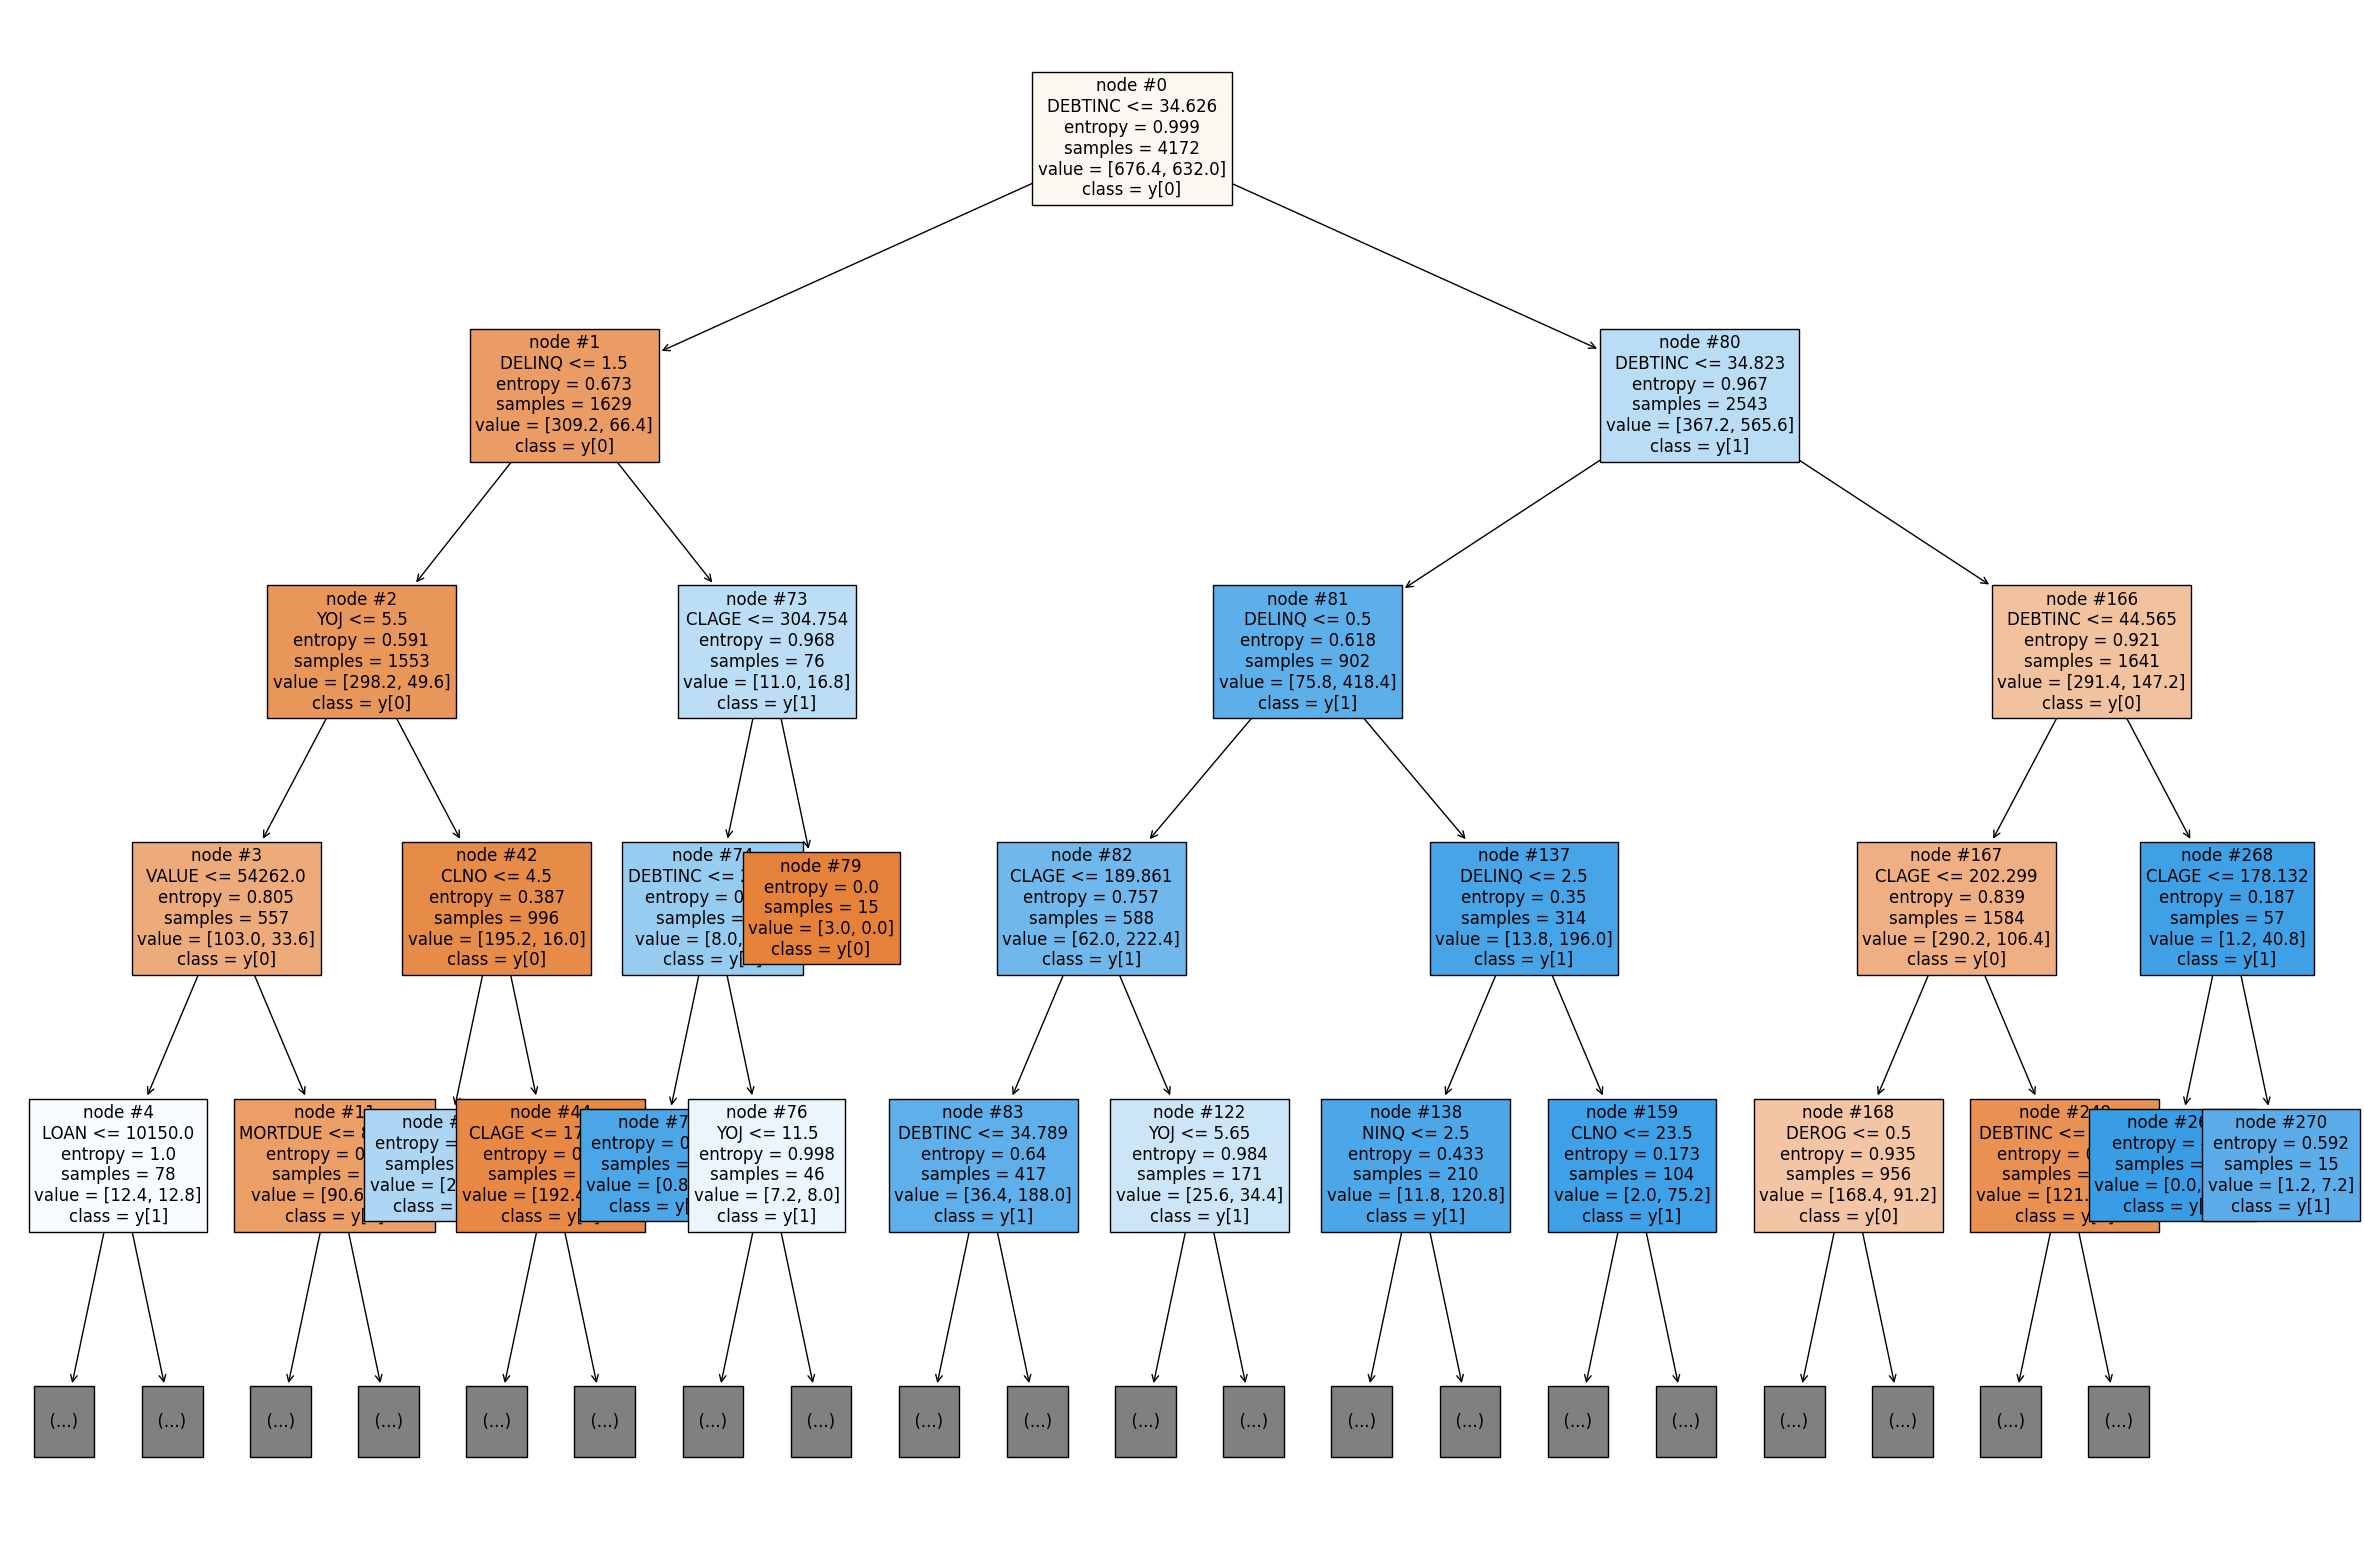

In [ ]:
# Plot the decision tree model
plt.figure(figsize = (30, 20))
plot_tree(dt_tuned, max_depth = 4, feature_names = X.columns.tolist(), filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

Observations:

We can see that the decision tree is now pruned, though the first few nodes are still the same. This suggests that they are indeed quite important to the overall classification. We can look at the imporant features according to the tuned model to check if there are any changes.

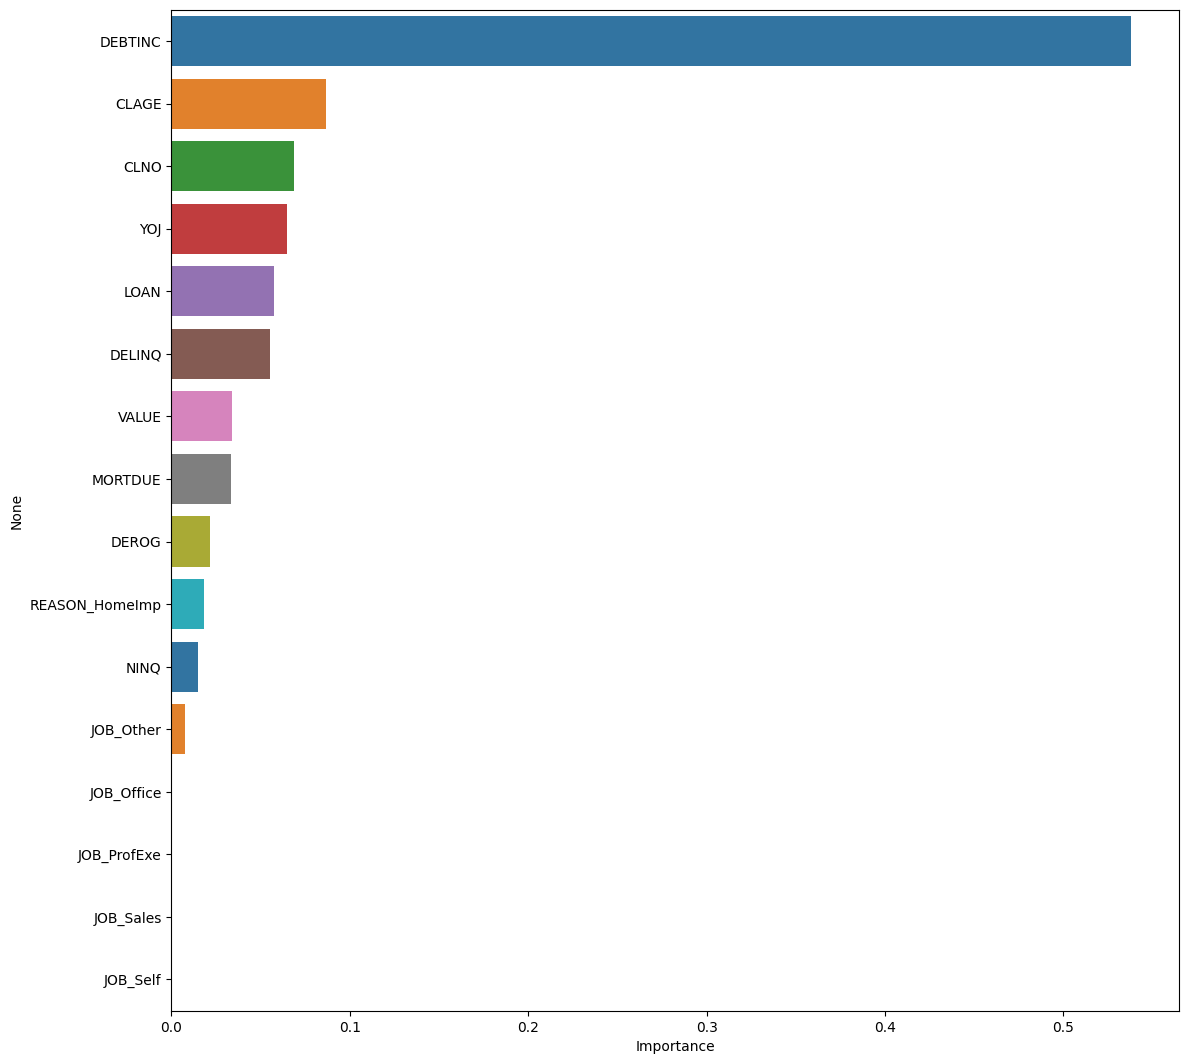

In [ ]:
# Plot the important features
importances_dt = dt_tuned.feature_importances_
importance_df = pd.DataFrame(importances_dt, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

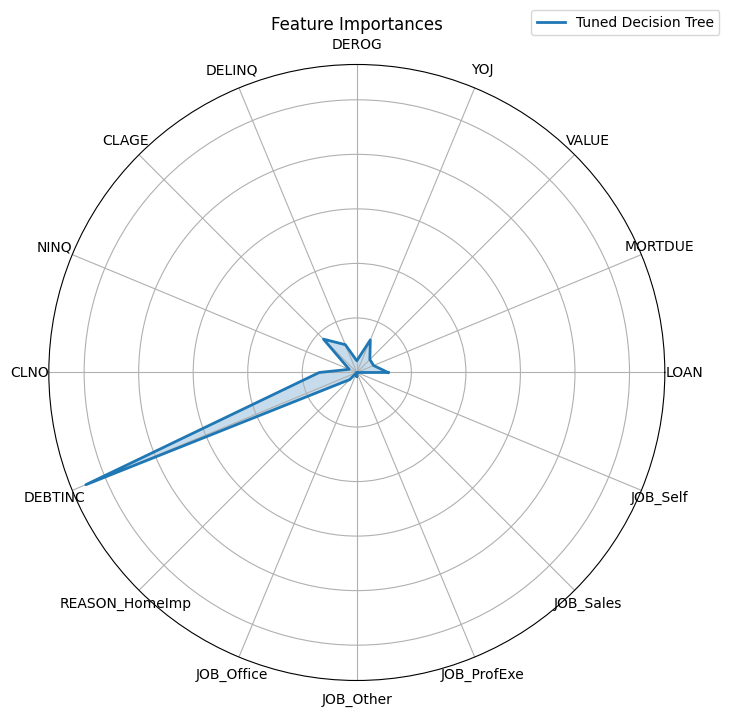

In [ ]:
# Show the polar plot
create_polar_plot(importances_dt, 'Tuned Decision Tree')

Observations:

We can see that the most important feature continues to be the debt-to-income ratio and the important features are overall similar to the untuned model. The tuned decision tree is so far the best model, but it still had below 90% on all metrics on the test data, so we can try to improve them by implementing a random forest classifier.

### **Random Forest**

A random forest is a bagging algorithm based on decision trees. It operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes of the individual trees. We can use a random forest classifier to improve the results compared to our individual decision tree model.

In [ ]:
# Defining the classifier
rf = RandomForestClassifier(class_weight= {0: 0.2, 1: 0.8},random_state = 42) # use class_weight to account for imbalance in data

In [ ]:
# Train the data on the training set
rf.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

In [ ]:
# Make the predictions for the training data and the test data
Y_rf_train = rf.predict(X_train)
Y_rf_test = rf.predict(X_test)

Metrics for RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42):


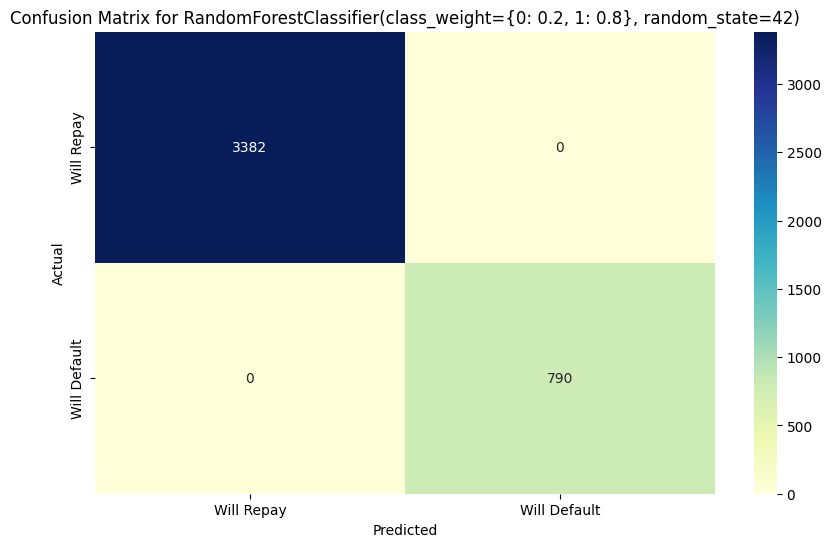

In [ ]:
# Print the model evaluations for the training data
rf_eval_train = evaluate_model(Y_train,Y_rf_train,rf)

Metrics for RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42):


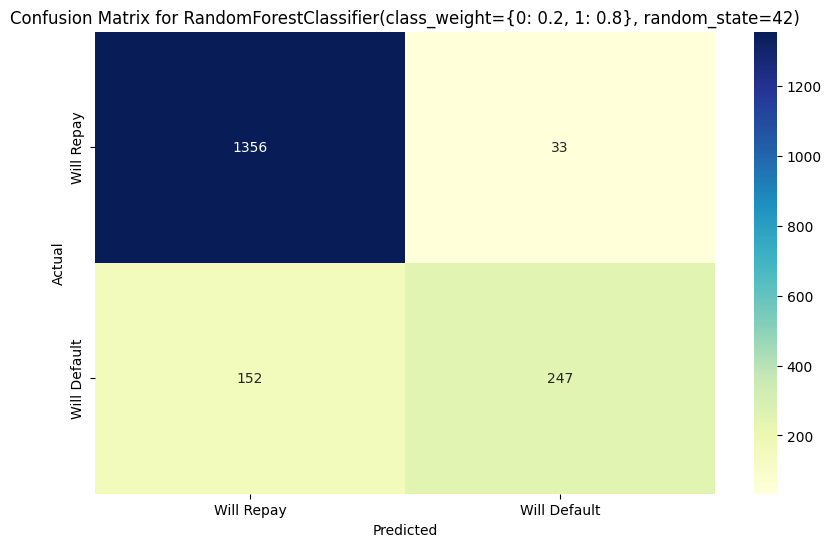

In [ ]:
# Print the model evaluations for the test data
rf_eval = evaluate_model(Y_test,Y_rf_test,rf)

Observations:

We can see that similar to the single decision tree, the random forest classifier shows perfect performance on the test data. It also has a better overall performance than the single decision tree, but the recall on the positive class remains quite poor. We can look at the important features according to the random forest classifier.

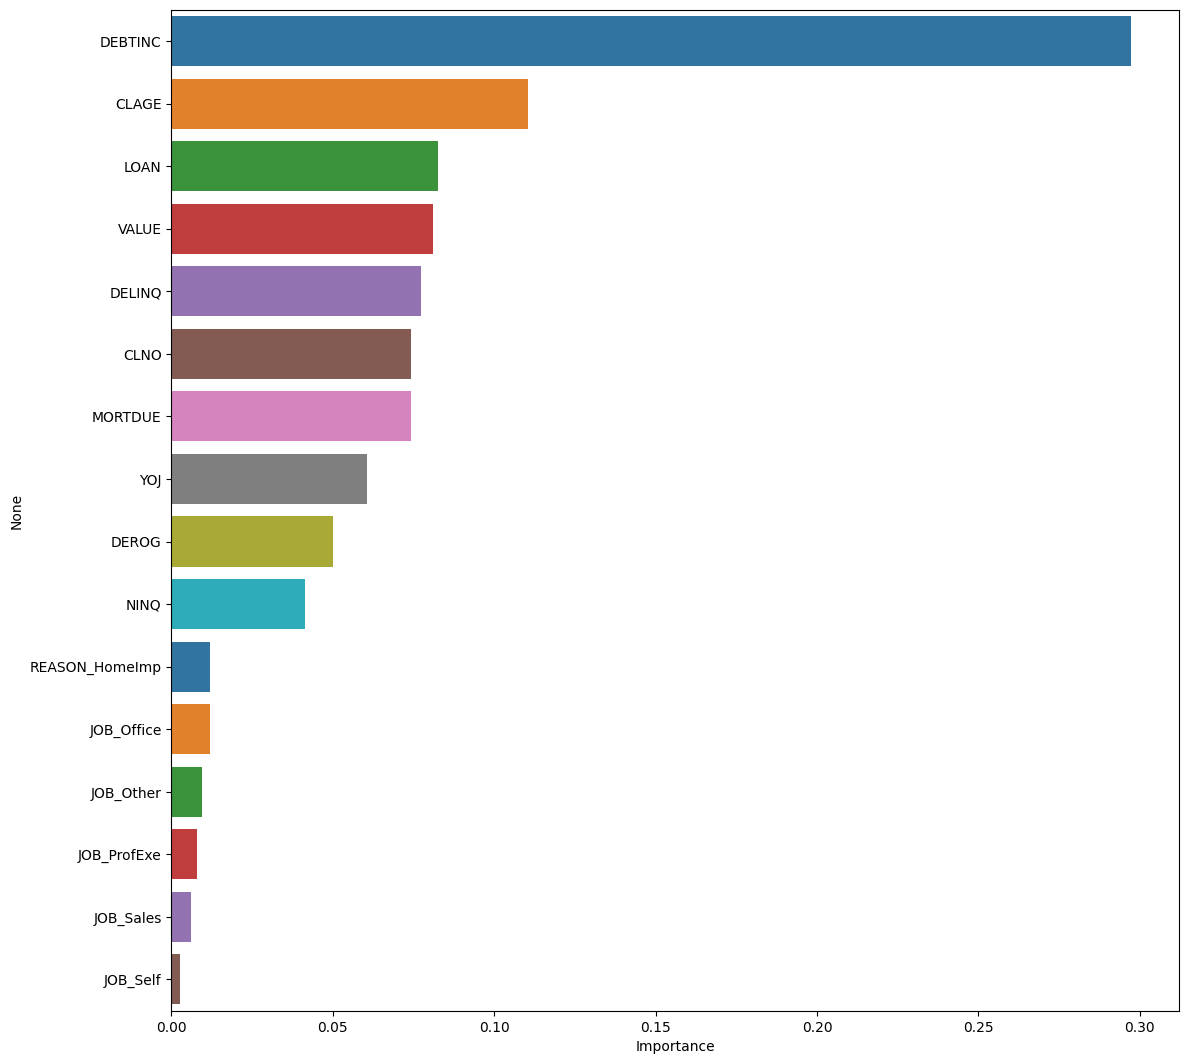

In [ ]:
# Plot the important features
importances = rf.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

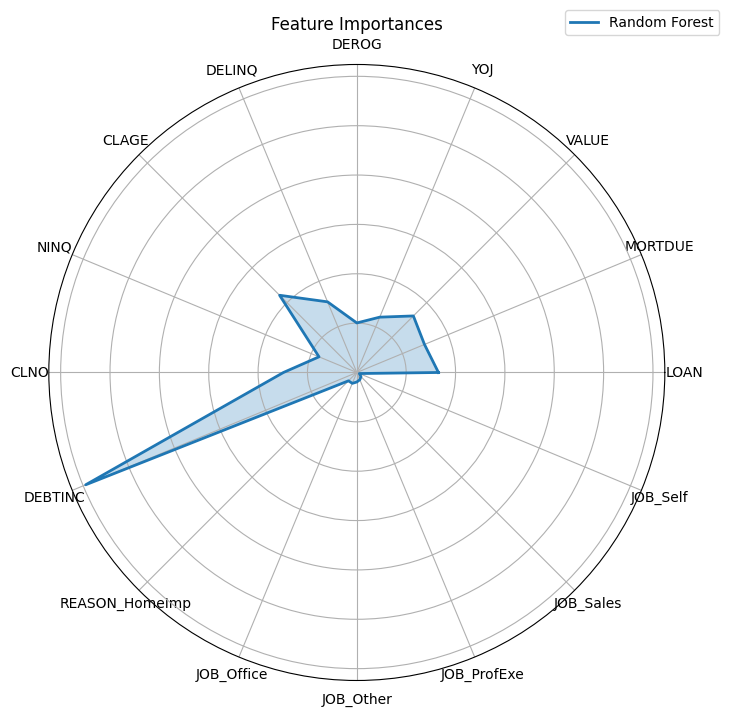

In [ ]:
# Show the polar plot
create_polar_plot(importances, 'Random Forest')

Observations:

We can see that for the random forest, the important features remain consistent as those for the individual decision tree. On the polar plot, we can see that the relative weight of the features apart from debt-to-income ratio has increased. We can try to implement some parameter tuning to improve the performance, especially regarding the recall.

#### **Hyperparameter Tuning**

We can tune the parameters of the random forest classifier to try to improve the model further.

In [ ]:
# Random forest classifier tuning
rf_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 42) # set the class weight to the proportion of the positive results in the data and weighing more heavily the positive results

# Grid of parameters to choose from
parameters = {  'n_estimators': [100, 200, 300],
    'max_depth': [None, 2,5,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1) # since we are trying to minimize false negatives we can optimize the recall

# Run the grid search
gridCV = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, Y_train)

# Set the classifier to the best combination of parameters
rf_tuned = gridCV.best_estimator_

In [ ]:
# Make the predictions for the training data and the test data
Y_rf_tuned_train = rf_tuned.predict(X_train)
Y_rf_tuned_test = rf_tuned.predict(X_test)

Metrics for RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=10,
                       min_samples_leaf=10, n_estimators=300, random_state=42):


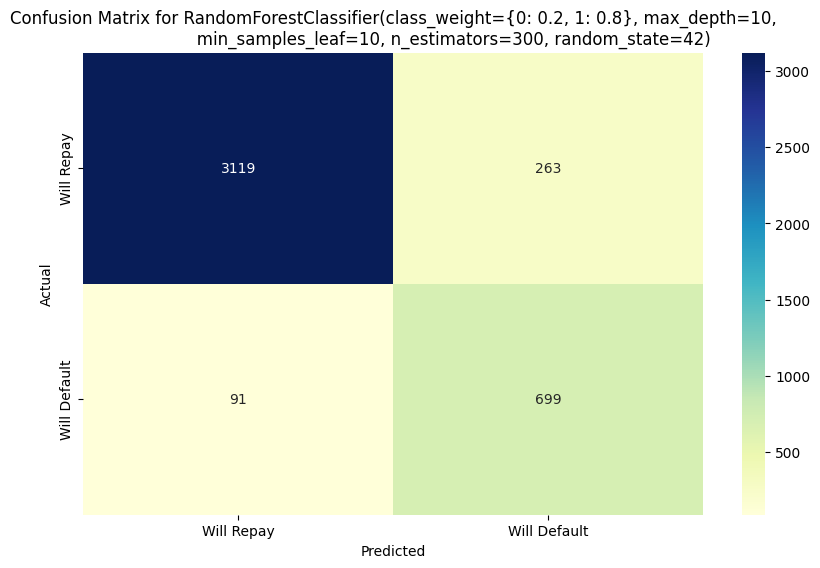

In [ ]:
# Print the model evaluations for the training data
rf_tuned_eval_train = evaluate_model(Y_train,Y_rf_tuned_train,rf_tuned)

Metrics for RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=10,
                       min_samples_leaf=10, n_estimators=300, random_state=42):


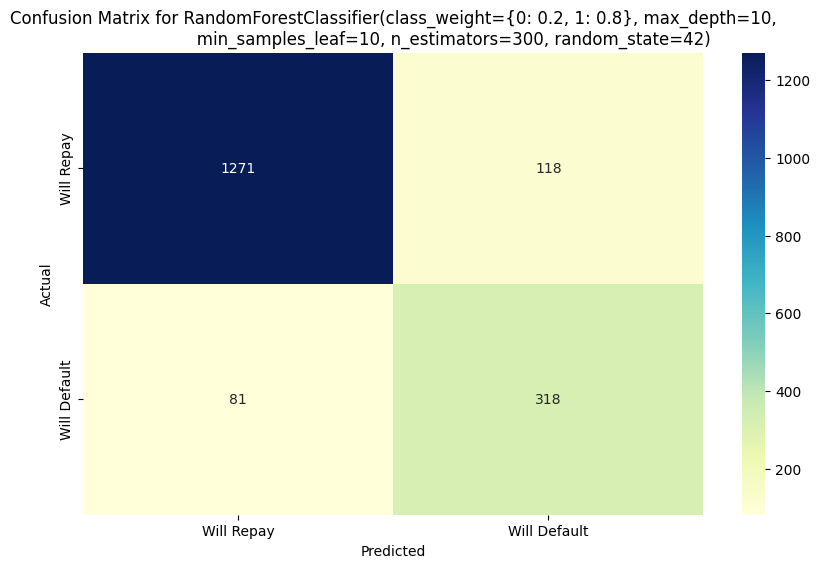

In [ ]:
# Print the model evaluations for the test data
rf_tuned_eval = evaluate_model(Y_test,Y_rf_tuned_test,rf_tuned)

Observations:

We can see that the overall performance of the model on the test data is the best so far, and the recall value is about the same as for the one for the tuned decision tree. This means that the tuned random forest is overall outperforming the single decision tree. We can once again plot the important features of the model.

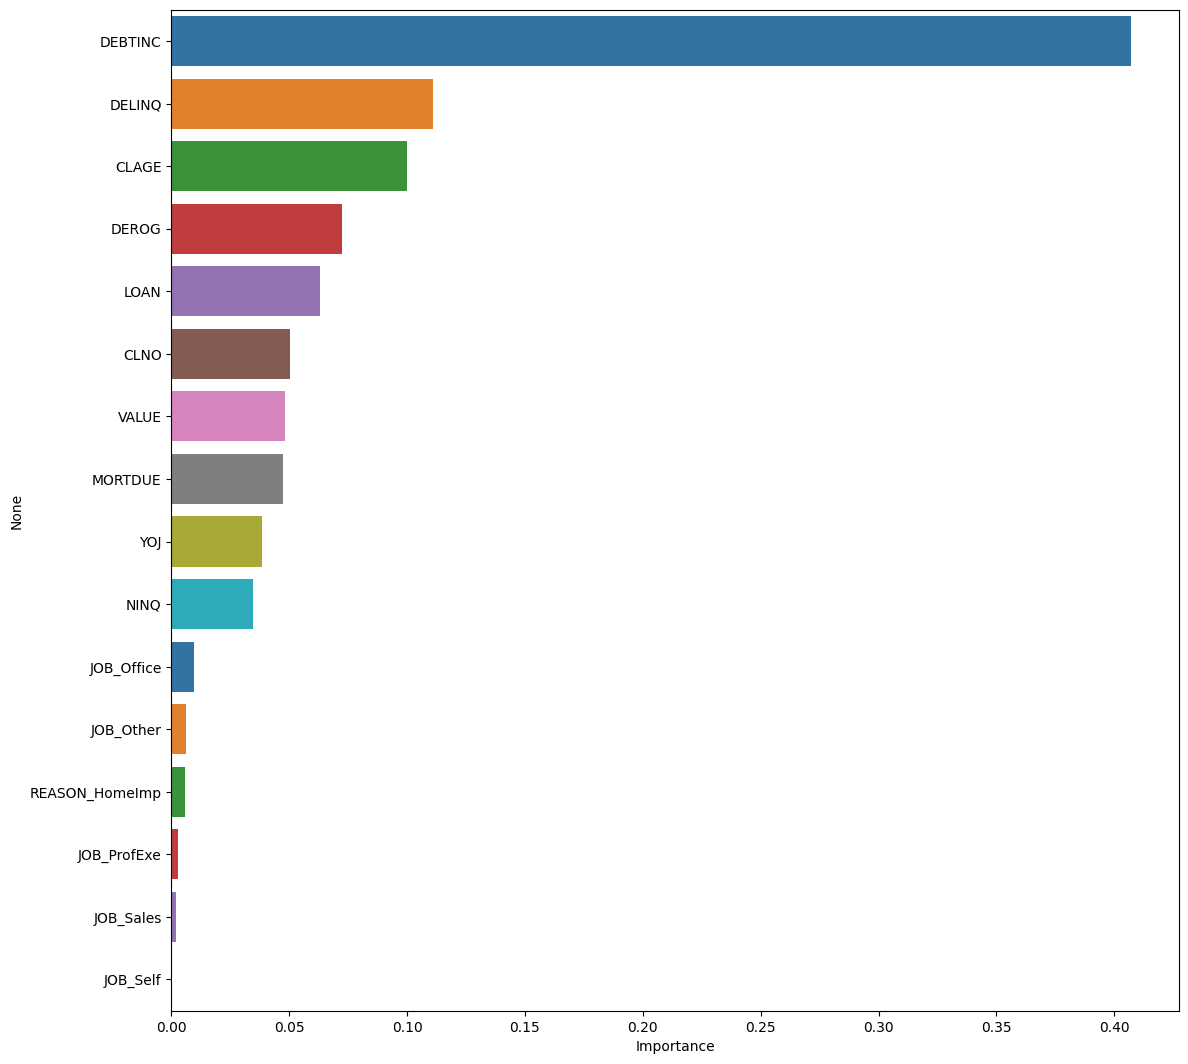

In [ ]:
# Plot the important features
importances_rf = rf_tuned.feature_importances_
importance_df = pd.DataFrame(importances_rf, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

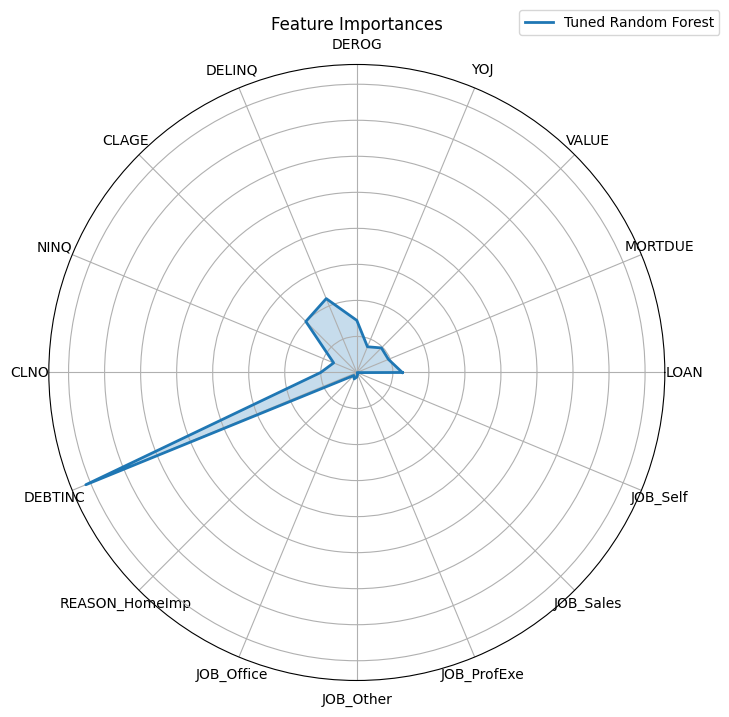

In [ ]:
# Show the polar plot
create_polar_plot(importances_rf, 'Tuned Random Forest')

Observations:

We can see that the number of delinquent credit lines has overtaken the age of credit line as the second most important feature and the number of derogatory claims has moved up to fourth. This is in line with expectations from EDA. On the polar plot we also see that the relative weight of dept-to-income is higher compared to the untuned model. The tuned random forest is the best model so far, but we can try to implement a gradient boosting classifier to improve even further.

### **XGBoost**

XGBoost, short for Extreme Gradient Boosting, is a powerful and efficient machine learning algorithm known for its scalability and performance. It belongs to the ensemble learning family and is based on the gradient boosting framework, where weak learners are sequentially trained to correct the errors of previous models. By optimizing a differentiable loss function and employing techniques like tree pruning and regularization, XGBoost achieves state-of-the-art results across a wide range of machine learning tasks, making it a popular choice for both competitions and real-world applications. We can apply it here to our problem.

In [ ]:
# Define the XGboost classifier
xgb = XGBClassifier(scale_pos_weight = 4, random_state=42) # scale_pos_weight = 4 because of the 80/20 class 0 to class 1 ratio

In [ ]:
# Train the model
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions for the training and test data
Y_xgb_train = xgb.predict(X_train)
Y_xgb_test = xgb.predict(X_test)

Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):


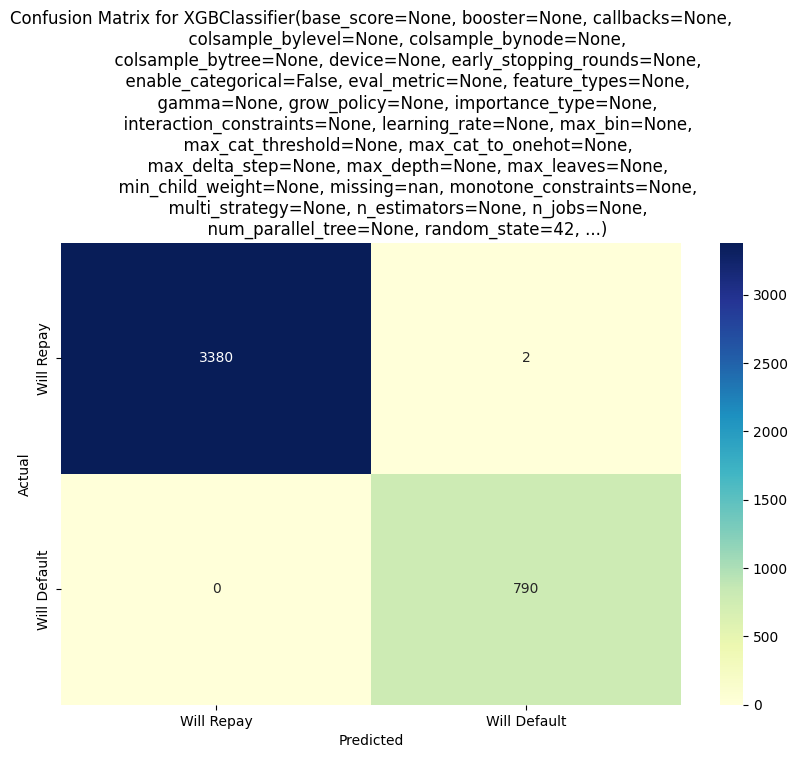

In [ ]:
# Print the model evaluations for the training data
xgb_eval_train = evaluate_model(Y_train,Y_xgb_train,xgb)

Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):


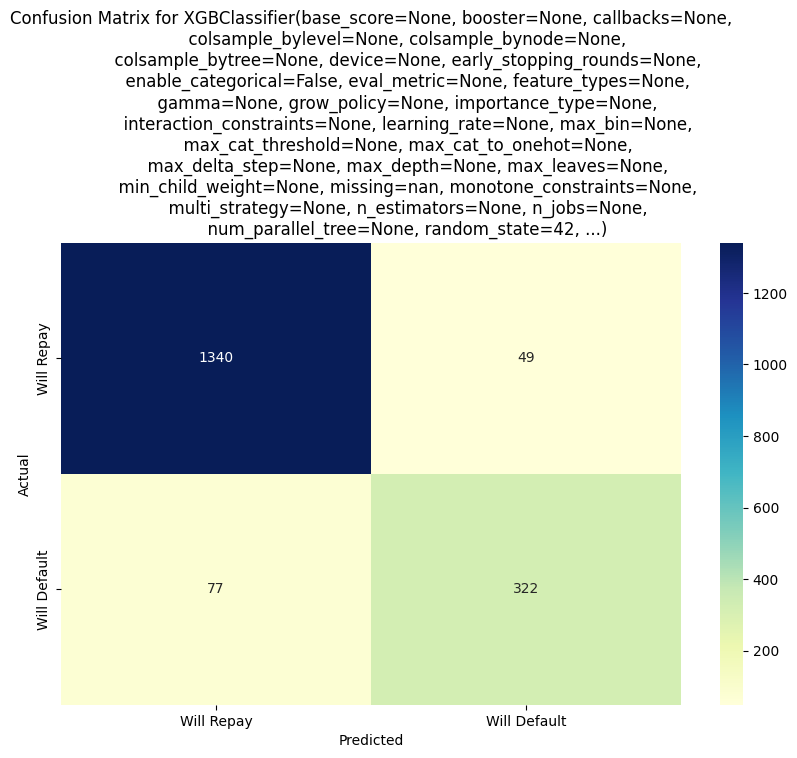

In [ ]:
# Print the model evaluations for the test data
xgb_eval = evaluate_model(Y_test,Y_xgb_test,xgb)

Observations:

The XGBoost classifier shows near perfect performance on the training data and excellent performance on the test data. Its overall metrics are all above 90% and has a recall of the positive class on the same level as the tuned decision tree or tuned random forrest model. We can plot the importance of the features again to try to understand the classfier.

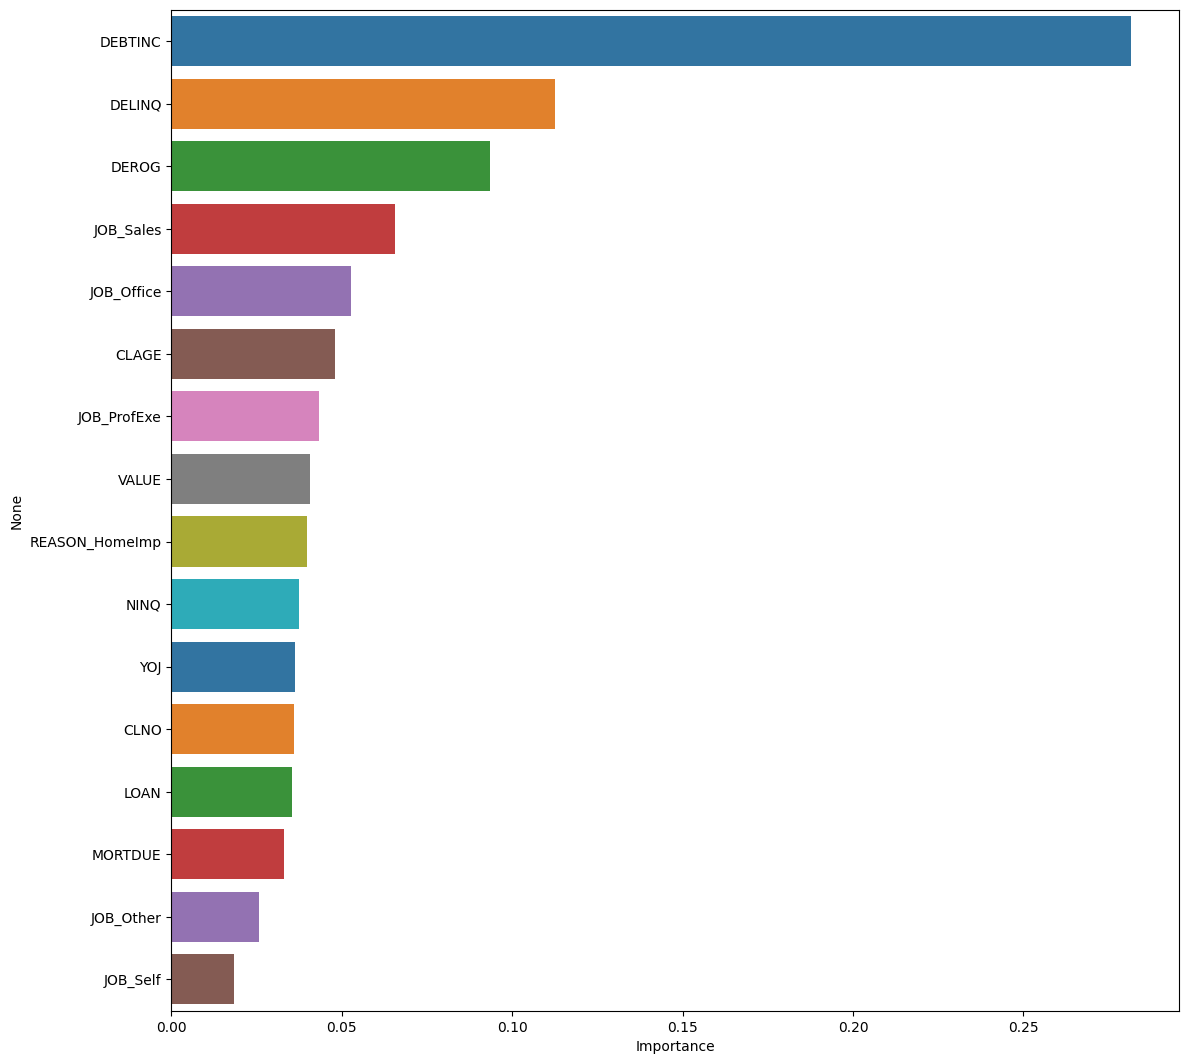

In [ ]:
# Plot the important features
importances = xgb.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

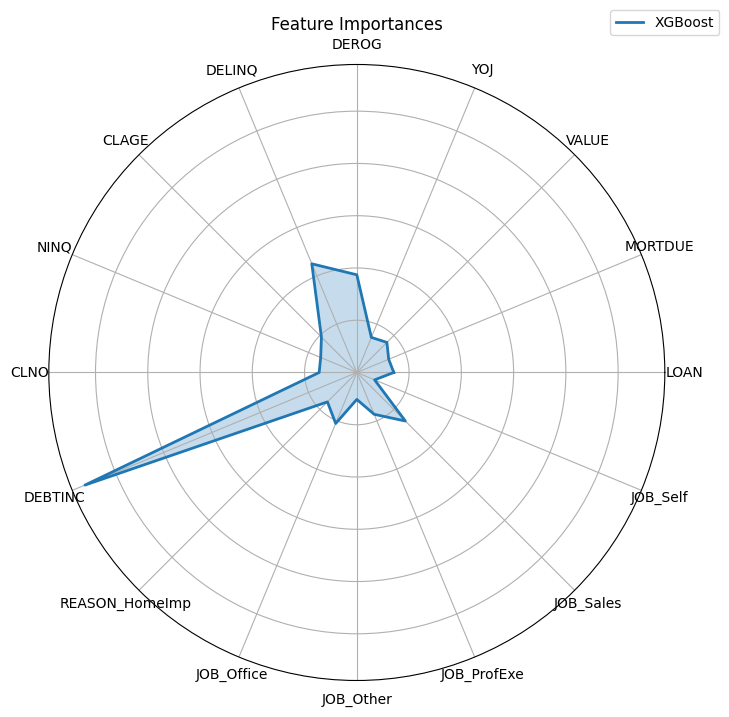

In [ ]:
# Show the polar plot
create_polar_plot(importances, 'XGBoost')

Observations:

We can see that for the XGBoost classifier, the most important features are the dept-to-income ratio, followed by the number of delinquent credit lines, the number of derogatory reports, and then whether the job is in sales. These are all in line with the EDA, however the last feature may be a bias inherited from this specific data set. We should be cautious to not accidentally heavily disfavor people in sales positions. We can also try to hypertune the parameters of the XGBoost classifier to see if we can even further improve performance.

#### **Hyperparameter Tuning**

We can also implement a different hyperparameter tuning instead of GridSearchCV by using RandomizedSearch from a grid of hyperparameter values and choosing combinations randomly. We will implement this here to attempt to improve the XGBoost classifier.

In [ ]:
# Import the RandomizedSearchCV function
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_tuned = XGBClassifier(scale_pos_weight = 4,random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_grid,
    scoring='recall',  # Optimization metric: recall of positive class
    n_iter=100,  # Maximum total combinations
    cv=5,  # 5-fold cross-validation
    random_state=42
)

# Perform hyperparameter tuning
random_search.fit(X_train, Y_train)

xgb_tuned = random_search.best_estimator_


In [ ]:
# Make predictions for the training and test data
Y_xgb_tuned_train = xgb_tuned.predict(X_train)
Y_xgb_tuned_test = xgb_tuned.predict(X_test)

Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):


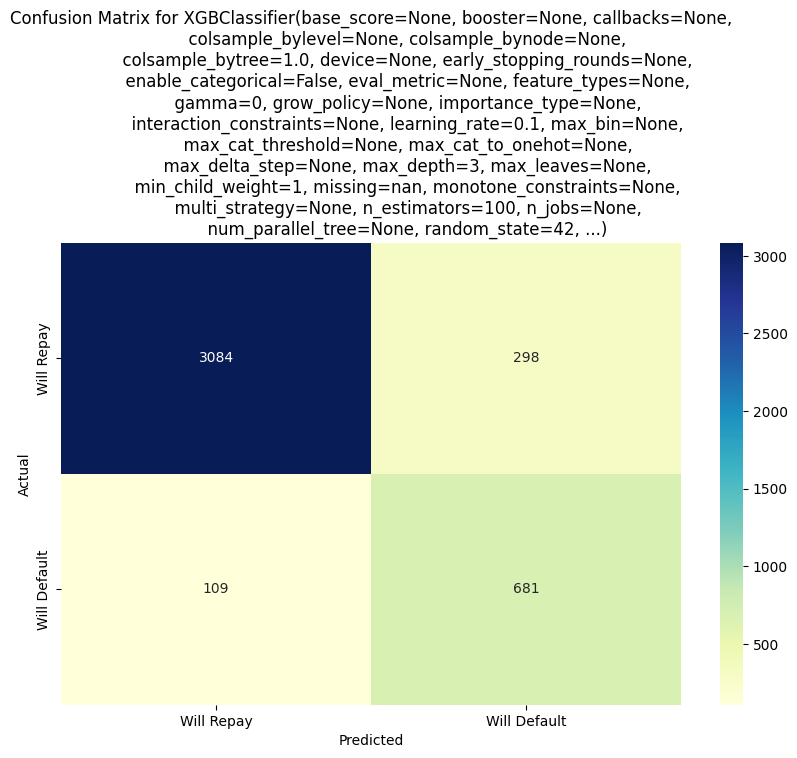

In [ ]:
# Print the model evaluations for the training data
xgb_tuned_eval_train = evaluate_model(Y_train,Y_xgb_tuned_train,xgb_tuned)

Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...):


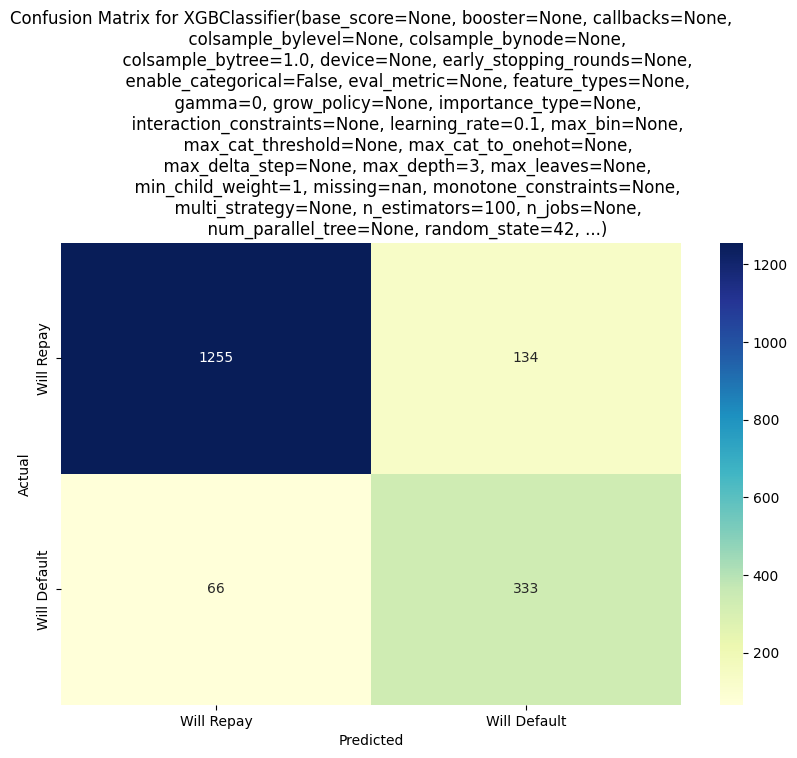

In [ ]:
# Print the model evaluations for the test data
xgb_tuned_eval = evaluate_model(Y_test,Y_xgb_tuned_test,xgb_tuned)

Observations:

The performance on the training data is worse now, as we expect for less overfitting. We can also see that this model gives us the best recall value for the positive class so far, while maintaining overall performance on the test data to around 90%. We can plot the important features again to understand the model better.

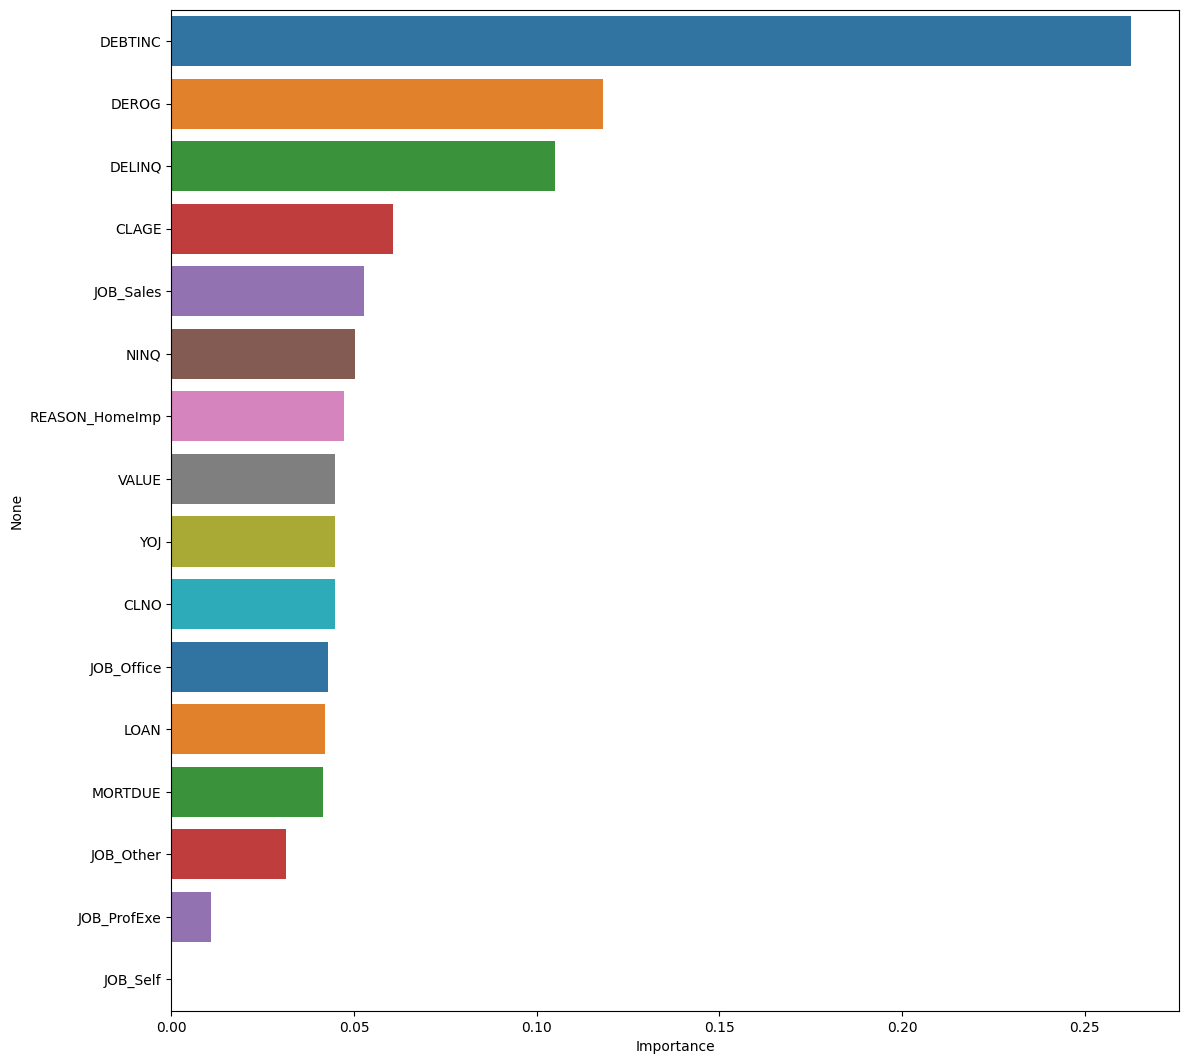

In [ ]:
# Plot the important features
importances_xgb = xgb_tuned.feature_importances_
importance_df = pd.DataFrame(importances_xgb, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

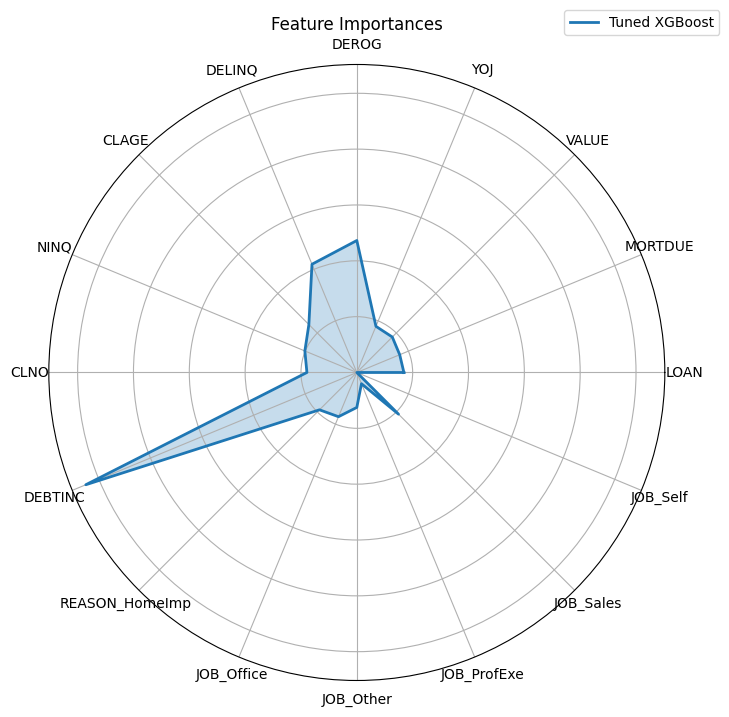

In [ ]:
# Show the polar plot
create_polar_plot(importances_xgb, 'Tuned XGBoost')

Observations:

We can see that in the tuned model, the bias against sales jobs has decreased and the age of the oldest credit line has become the fourth most important feature, bringing it closer in relevance to our expectation from the decision tree and random forest classifiers.

## **Conclusions**

1. Comparison of models

After building eight different models we can make a final comparison between them and display the evaluation metrics:

In [ ]:
# combine the metric column with the score column from each model
models_test_comp_df = pd.concat(

    [
    lr_eval.Metric,lr_eval.Score, lr_scaled_eval.Score,dt_eval.Score,
    dt_tuned_eval.Score, rf_eval.Score, rf_tuned_eval.Score,
    xgb_eval.Score, xgb_tuned_eval.Score
    ],

    axis = 1,
)

# Label all the columns based on the model
models_test_comp_df.columns = ["Metric",
    "Logistic Regression",
    "Scaled Logistic Regression",
    "Decision Tree Classifier",
    "Tuned Decision Tree Classifier",
    "Random Forest Classifier",
    "Tuned Random Forest Classifier",
    "XGBoost Classifier", "Tuned XGBoost Classifier"
]
display(models_test_comp_df.style.hide())

We can also compare the feature importances between the three best models:

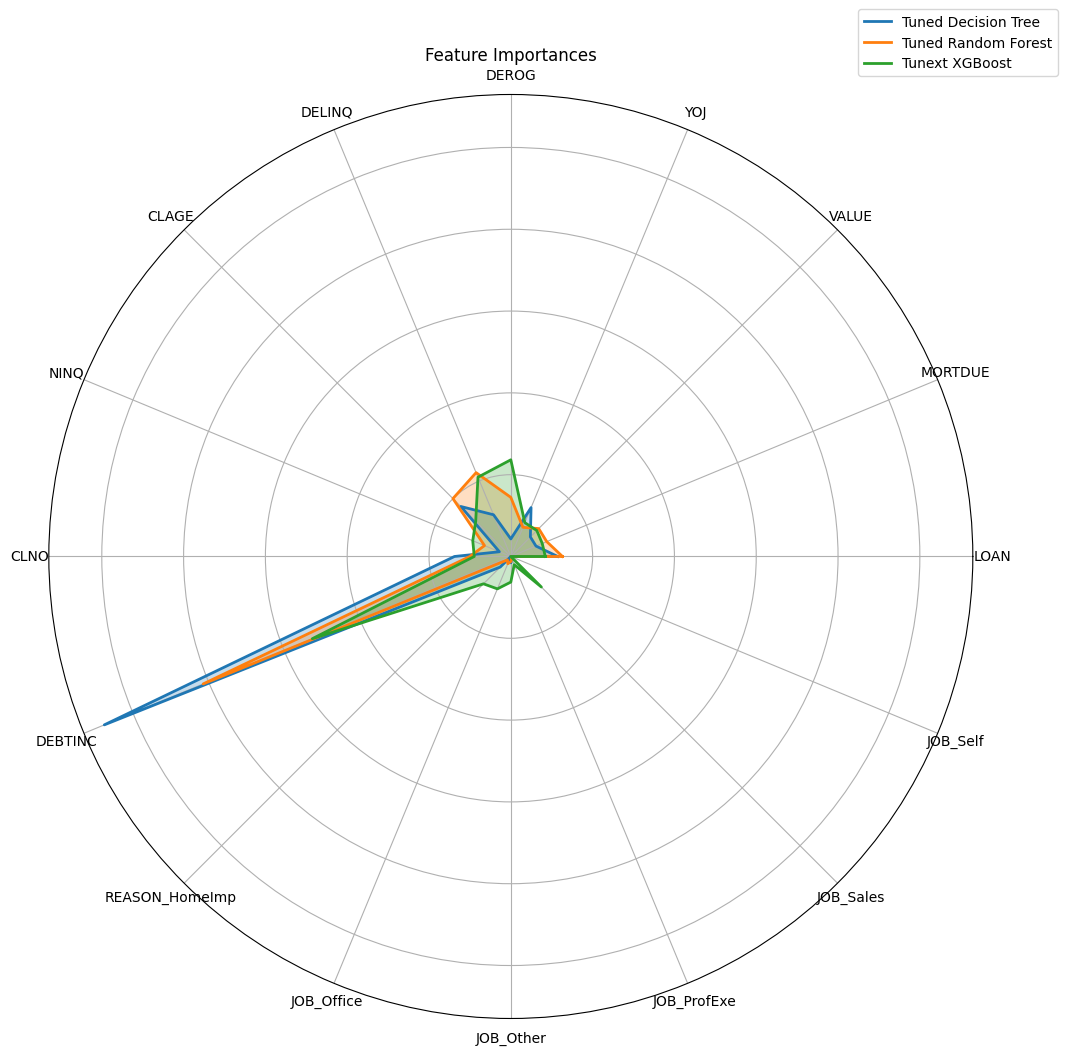

In [ ]:
# Compare the feature importance of the three best models
# combine importances
feature_importances = {
    'Tuned Decision Tree': importances_dt.tolist(),
    'Tuned Random Forest': importances_rf.tolist(),
    'Tunext XGBoost': importances_xgb.tolist()
}

# Create a polar plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

for model, importances in feature_importances.items():
    values = importances
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.25)

# Add feature labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.title('Feature Importances')
plt.show()

Observations:

All the tuned models perform reasonably well, with the Tuned XGBoost classifier standing out from the rest. Although overall performance is worse than the untuned XGBoost, the recall value is 3% better and there is less overfitting and more understandable feature importances. Since we obtained this model using RandomizedSearchCV, with longer computation time we can probably improve this model further. On the other hand, the logistic regression models performed the worst. Also, we can see that among the best models, the XGBoost weighs the highest number of features and can therefore give a more complete picture beyond the dept-to-income ratio.

**2. Refined insights:**
- We can see that the factors that contribute to a client defaulting on a loan a complicated and it is not easy to isolate a single decisive variable.
- The closest we can get is the debt-to-income ratio, which both intuitively and according to the classification models plays a key role in determining whether a client will default on their loan. This makes sense because in the purest sense it describes money in and money out and when the money out is larger at a certain point payment becomes impossible.
- It is important to note however that debt-to-income was the column with the most missing data and therefore it is likely that imputing those values can limit the performance of our models. In the ideal case, we would have a more complete data set where we have these values present for more clients.
- Another fundamental difficulty is that because of the imbalance in the data, models that assume everyone will pay their loans are going to be right about 80% of the time automatically. Over the size of populations, the loan default rate is even lower than that, so a lot of care is needed to make sure that the model has good recall. The best recall for the models in this notebook is 83%, so there is definitely room for improvements.
- We also saw that with the XGBoost model, some bias crept in from the data set, specifying people in sales as an important feature. This could be true, as people working in sales are more susceptible to fluctuations in income based on people's spending habits, but it can also be entirely an artifact of the data sample we have. We should be wary of these things when recommending classification models that can decide who gets a loan on a home.

**3. Proposal for the final solution design:**
Overall, I would suggest that the tuned XGBoosted model is adopted, as it shows great overall performance, as well as the lowest likelyhood of classifying a client who will default on their credit as a client who will pay it off. In second place, I would recommend the tuned decision tree model, as it also gives understandable factor weights and shows good performance. Although the untuned XGBoosted model shows great overall performance, it has the drawback of being overfitted and having some questionable importance factors. I would not recommend the logistic regression models, because even though their features are intuitive, the overall performance is too poor. Of course, more tuning can probably be done to improve these models further, but that is beyond the scope of this notebook and these results can serve as a launch pad for further investigation.